# Predicting NFL Defensive Player Career Longevity
<br>
<div>
<img src ="https://static.clubs.nfl.com/image/private/t_editorial_landscape_12_desktop/f_auto/cardinals/beo2sdtcay5wl7y9cryo.jpg" width = "500"/>
</div>

### Billie Kim
### Casey Ng
### Ethan Panal

Data Source: https://www.kaggle.com/datasets/trevyoungquist/2020-nfl-stats-active-and-retired-players?select=RetiredPlayer_Defense_Stats.csv

## Contents
1. [Objective of the Proposed Research](#1.-Objective-of-the-Proposed-Research)
2. [Data Exploration](#2.-Data-Exploration)
3. [Data Cleaning](#3.-Data-Cleaning)
4. [Adaptation](#4.-Adaptation)
5. [Descriptive Visualizations](#5.-Descriptive-Visualizations)
6. [Explore Correlations](#6.-Explore-Correlations)
7. [Response Variable](#7.-Response-Variable)
8. [Simple Linear Regression](#8.-Simple-Linear-Regression)
9. [Multiple Linear Regression](#9.-Multiple-Linear-Regression)
10. [Findings](#10.-Findings)
11. [Originality](#11.-Originality)
12. [References](#12.-References)

## 1. Objective of the Proposed Research
Football is a grueling and physical sport that can often lead to short career spans that are very volatile for many of the athletes who make it to the professional level. As the National Football League (NFL) continues to evolve, understanding the various aspects of player careers has become increasingly important, not only for the players themselves but general managers that manage multi-million dollar team salary budgets and player contracts. This research proposal seeks to delve into NFL defensive player career length, leveraging  data analysis to unravel trends in career longevity. By shedding light on career length trends, this study aims to provide NFL team managers with valuable insights that can inform on player development strategies and enhance team rosters. Specific descriptive analysis this project aims to answer include:
* What are the average career lengths of defensive players in the NFL?
* Which defensive positions have the longest and shortest careers?




NFL defensive player careers are marked by many complex factors that influence their longevity. This can make it difficult to predict which players have greater potential to survive at the highest level for a longer period of time. Every year, general managers (GMs) of teams must make plans and projections for their roster construction for the upcoming season, whilst also looking ahead often several years in advance. This project also aims to answer the following predictive analytics questions to aid general managers:

* Can we build a model that can accurately predict the number of years a defensive player plays?
* Which performance metrics best predict a defensive player's career length?
* How does physical features relate to career longevity?

The choices managers must make every offseason on whether or not to invest millions of dollars on athletes have huge implications on their team's present and future success. Proper allocation of resources is paramount to a well run organization. Poor decision making on this front very often leads to heavy criticism from fanbases and can cost front office personel to lose their jobs. As professional sports continues to further adapt more analytics based approaches in their decision making, it makes sense for football teams to be more data driven in their choices for roster construction.

## 2. Data Exploration

In [1]:
# install.packages("tidyverse")
suppressPackageStartupMessages(library(tidyverse))

In [2]:
# Read in files
retired_df <- read.csv("../content/RetiredPlayer_Defense_Stats.csv")

In [3]:
# Dimensions
cat("Number of Rows:", nrow(retired_df), "\n")
cat("Number of Columns:", ncol(retired_df), "\n")

Number of Rows: 65923 
Number of Columns: 16 


**Comment**: Here we check the dimensions of our data set. We have 65923 rows of different players and seasons they played. We also have 16 columns of different descriptive information and performance stats.

In [4]:
# Structure
str(retired_df)

'data.frame':	65923 obs. of  16 variables:
 $ Player_Id       : chr  "adam-archuleta" "adam-archuleta" "adam-archuleta" "adam-archuleta" ...
 $ Year            : chr  "2001" "2002" "2003" "2004" ...
 $ Team            : chr  "St.LouisRams" "St.LouisRams" "St.LouisRams" "St.LouisRams" ...
 $ Games_Played    : chr  "13" "16" "13" "16" ...
 $ Tackles         : chr  "48" "99" "66" "79" ...
 $ Solo_Tackles    : chr  "39" "85" "59" "66" ...
 $ Assisted_Tackles: chr  "9" "14" "7" "13" ...
 $ Sacks           : chr  "2" "2.5" "5" "2" ...
 $ Sack_Yards      : chr  "0" "0" "0" "0" ...
 $ Safties         : chr  "3" "4" "6" "2" ...
 $ Passes_Deflected: chr  "0" "1" "1" "0" ...
 $ INTs            : chr  "0" "0" "0" "0" ...
 $ TDs             : chr  "0" "2" "22" "0" ...
 $ INT_Yards       : chr  "0" "2" "22" "0" ...
 $ Average         : chr  "0" "2" "22" "0" ...
 $ Long            : logi  NA NA NA NA NA NA ...


**Comment**: Here we check the columns in our data set and their data types. We can see that all of the columns are read in as characters, which is not what we want. The performance stats should be numeric so we will have to change their types.

**Column Descriptions:**
- *Player_Id-* the unique name of the player
- *Year-* year of the season the player played
- *Games_Played-* number of games played during a single season
- *Tackles-* number of tackles the defense player made during the season
- *Solo_Tackles-* number of unassisted tackles the defense player made during the season
- *Assisted_Tackles-* number of tackles the defense player made in conjunction with another defensive player during the season
- *Sacks-* number of tackles the defensive player made on the quarterback in the backfield on a passing play
- *Sack_Yards-* number of loss yards the defensive player incurred on the opposing team when making sacks
- *Safeties-* number of tackles the defensive player made on the opposing team when an offensive player was tackled in their own end zone
- *INTs -* number of receptions the defensive player has caught


In [5]:
# Convert classes to numeric
cols <- c(4:15)
retired_df[cols] <- as.numeric(as.matrix(retired_df[cols]))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [6]:
# Summary Stats
summary(retired_df)

  Player_Id             Year               Team            Games_Played   
 Length:65923       Length:65923       Length:65923       Min.   :  0.00  
 Class :character   Class :character   Class :character   1st Qu.: 10.00  
 Mode  :character   Mode  :character   Mode  :character   Median : 14.00  
                                                          Mean   : 20.31  
                                                          3rd Qu.: 16.00  
                                                          Max.   :382.00  
                                                          NA's   :66      
    Tackles         Solo_Tackles     Assisted_Tackles      Sacks        
 Min.   :   0.00   Min.   :  0.000   Min.   :  0.000   Min.   :  0.000  
 1st Qu.:   0.00   1st Qu.:  0.000   1st Qu.:  0.000   1st Qu.:  0.000  
 Median :   0.00   Median :  0.000   Median :  0.000   Median :  0.000  
 Mean   :  12.41   Mean   :  9.046   Mean   :  3.364   Mean   :  1.119  
 3rd Qu.:   4.00   3rd Qu.:  3.000 

**Comment**: Now that we’ve changed the performance statistic columns to numeric columns, we take a look at the summary statistics for all of our numeric columns. We can see that we have many missing values for each column and we can see that the distributions of many of our columns are very close to 0.

In [7]:
# print out head
head(retired_df, n=10)

,Player_Id,Year,Team,Games_Played,Tackles,Solo_Tackles,Assisted_Tackles,Sacks,Sack_Yards,Safties,Passes_Deflected,INTs,TDs,INT_Yards,Average,Long
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,adam-archuleta,2001,St.LouisRams,13,48,39,9,2.0,0,3,0,0,0,0.0,0,NA
2,adam-archuleta,2002,St.LouisRams,16,99,85,14,2.5,0,4,1,0,2,2.0,2,NA
3,adam-archuleta,2003,St.LouisRams,13,66,59,7,5.0,0,6,1,0,22,22.0,22,NA
4,adam-archuleta,2004,St.LouisRams,16,79,66,13,2.0,0,2,0,0,0,0.0,0,NA
5,adam-archuleta,2005,St.LouisRams,14,58,41,17,3.5,0,2,1,1,85,85.0,85,NA
6,adam-archuleta,2006,WashingtonRedskins,16,48,37,11,1.0,0,1,0,0,0,0.0,0,NA
7,adam-archuleta,2007,ChicagoBears,15,56,49,7,2.0,0,3,1,0,4,4.0,4,NA
8,adam-archuleta,TOTAL,--,103,454,376,78,18.0,0,21,4,1,113,28.3,113,NA
9,adrian-awasom,2005,NewYorkGiants,5,2,2,0,0.0,0,0,0,0,0,0.0,0,NA


**Comment**: Lastly, we take a quick look at the data by looking at the top 10 rows. We see the first 8 rows are for the same player, Adam Archuleta, who played 7 seasons with his last row being his totals from his career.

## 3. Data Cleaning

**Comment:** In this section, we will be conducting some initial data cleaning operations such as dealing with the 'TOTAL' records and removing unwanted columns.

In [8]:
# Create a dataframe to store "TOTAL" rows
totals_df <- retired_df[retired_df$Year == "TOTAL", ]

cat("Number of 'TOTAL' Rows:", nrow(totals_df))
head(totals_df, n=5)

Number of 'TOTAL' Rows: 9427

,Player_Id,Year,Team,Games_Played,Tackles,Solo_Tackles,Assisted_Tackles,Sacks,Sack_Yards,Safties,Passes_Deflected,INTs,TDs,INT_Yards,Average,Long
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
8,adam-archuleta,TOTAL,--,103,454,376,78,18.0,0,21,4,1,113,28.3,113,NA
13,adrian-awasom,TOTAL,--,18,16,12,4,1.0,0,0,0,0,0,0.0,0,NA
21,akeem-ayers,TOTAL,--,97,311,209,102,15.5,0,22,4,0,32,8.0,32,NA
31,akin-ayodele,TOTAL,--,143,630,447,183,9.5,0,22,7,0,68,9.7,54,NA
35,al-afalava,TOTAL,--,29,66,47,19,2.0,0,8,1,0,0,0.0,0,NA


In [9]:
# Cut out total rows from defensive player csv
retired_df <- retired_df[retired_df$Year != "TOTAL", ]

In [10]:
# Check to see if there are any "TOTAL" rows left
retired_df[retired_df$Year == "TOTAL", ]

Player_Id,Year,Team,Games_Played,Tackles,Solo_Tackles,Assisted_Tackles,Sacks,Sack_Yards,Safties,Passes_Deflected,INTs,TDs,INT_Yards,Average,Long
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>


**Comment:** Awesome! Looks like we successfully removed all the "TOTAL" records in the 'Year' column. Just in case we'd like to access the records later on, we created a separate dataframe to store the data.

In [11]:
# Remove unwanted columns
retired_df <- retired_df %>%
    select(-c('Team','Average','Long'))

In [12]:
# Print column names
names(retired_df)

[1] "Player_Id"        "Year"             "Games_Played"     "Tackles"         
 [5] "Solo_Tackles"     "Assisted_Tackles" "Sacks"            "Sack_Yards"      
 [9] "Safties"          "Passes_Deflected" "INTs"             "TDs"             
[13] "INT_Yards"

**Comment:** There are several columns that will not be useful in our analysis such as 'Team', 'Average', and 'Long'. We went ahead and removed these columns to condense our dataframe.

## 4. Adaptation

**Comment:** Currently, each row in the dataset is a season in a player's career. We will group their average statistics over the years that they have played to create 12 new aggregated columns that describe a unique player's average season performance.

In [13]:
 # Group by player, sum years to get career length, average all other metrics
retired_careers_df <- retired_df |>
  group_by(Player_Id) |>
  summarise(careerLength = n_distinct(Year),
            avgGamesPlayedSeason = mean(Games_Played),
            avgTackles = mean(Tackles),
            avgSoloTackles = mean(Solo_Tackles),
            avgAsstTackles = mean(Assisted_Tackles),
            avgSacks = mean(Sacks),
            avgSackYards = mean(Sack_Yards),
            avgSafety = mean(Safties),
            avgPassDeflect = mean(Passes_Deflected),
            avgINTs = mean(INTs),
            avgTD = mean(TDs),
            avgINTyard = mean(INT_Yards)) |>
  mutate(across(everything(), ~replace_na(.x, 0)))

# Print out first five rows of the new dataframe
head(retired_careers_df, n=5)

Player_Id,careerLength,avgGamesPlayedSeason,avgTackles,avgSoloTackles,avgAsstTackles,avgSacks,avgSackYards,avgSafety,avgPassDeflect,avgINTs,avgTD,avgINTyard
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a-j-derby,3,8.333333,1.3333333,1.3333333,0.0,0.0000,0.000,0,0.000,0,0.00,0.00
a-j-duhe,8,13.500000,0.0000000,0.0000000,0.0,1.0625,0.125,0,0.375,0,2.25,2.25
a-j-edds,2,8.500000,6.5000000,1.5000000,5.0,0.0000,0.000,0,0.000,0,0.00,0.00
a-j-feeley,11,2.545455,0.1818182,0.1818182,0.0,0.0000,0.000,0,0.000,0,0.00,0.00
a-j-francis,4,2.250000,4.2500000,0.7500000,3.5,0.0000,0.000,0,0.000,0,0.00,0.00


**Comment:** Now we have a dataset with unique players in each row with their career length in years and their average performance stats per season. We'll join this data with physical traits of each unique player.

In [14]:
# Read in file: Retired_Player_Basic_Stats.csv
basic_stats_df <- read.csv("../content/Retired_Player_Basic_Stats.csv")

In [15]:
dim(basic_stats_df)
head(basic_stats_df, n=5)

[1] 40832     7

,Player_Id,Full_Name,Position,Height,Weight,College,Hall_Of_Fame
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,anderson,Anderson,WB,--,0,No College,False
2,arrowhead,Arrowhead,E,5-7,160,No College,False
3,aaron-adams-2,Aaron Adams,--,--,--,LSU,False
4,aaron-adams,Aaron Adams,OT,6-5,303,Eastern Kentucky,False
5,abdul-karim-al-jabbar,Abdul-Karim al-Jabbar,RB,5-11,205,UCLA,False


In [16]:
# Subset dataframe with desired features
basic_stats_df <- basic_stats_df[c('Player_Id','Position','Height','Weight')]

head(basic_stats_df, n=5)

,Player_Id,Position,Height,Weight
,<chr>,<chr>,<chr>,<chr>
1,anderson,WB,--,0
2,arrowhead,E,5-7,160
3,aaron-adams-2,--,--,--
4,aaron-adams,OT,6-5,303
5,abdul-karim-al-jabbar,RB,5-11,205


In [17]:
# join basic stats to retired player csv to get physical features
master_df <- retired_careers_df %>%
  inner_join(basic_stats_df, by = "Player_Id") %>%
 # adding this filters only for defensive player
  subset(Position %in% c('LB','DT','CB','DB','DE','OLB','SS','FS','ILB','MLB'))

In [18]:
# Convert classes to numeric
# The height conversion code was modeled from Stackoverflow code and tailored to meet wrangling needs for this dataset
feet <- as.numeric(sub("-.*", "", master_df$Height))
inches <- as.numeric(sub(".*-", "", master_df$Height))
master_df$Height <- as.double((feet * 12) + inches)

# Convert weight to double
master_df$Weight<-as.double(master_df$Weight)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [19]:
head(master_df, n=10)

Player_Id,careerLength,avgGamesPlayedSeason,avgTackles,avgSoloTackles,avgAsstTackles,avgSacks,avgSackYards,avgSafety,avgPassDeflect,avgINTs,avgTD,avgINTyard,Position,Height,Weight
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
a-j-duhe,8,13.50000,0.00000,0.00000,0.000000,1.0625000,0.125,0.000000,0.3750000,0.0000000,2.25000,2.25000,LB,76,247
a-j-edds,2,8.50000,6.50000,1.50000,5.000000,0.0000000,0.000,0.000000,0.0000000,0.0000000,0.00000,0.00000,LB,76,256
a-j-francis,4,2.25000,4.25000,0.75000,3.500000,0.0000000,0.000,0.000000,0.0000000,0.0000000,0.00000,0.00000,DT,77,332
a-j-hawk,11,14.45455,74.72727,47.27273,27.454545,1.8181818,0.000,3.000000,0.8181818,0.0000000,11.00000,5.80000,LB,73,240
a-j-jefferson,4,10.75000,26.50000,24.00000,2.500000,0.0000000,0.000,4.750000,0.5000000,0.0000000,0.25000,0.25000,CB,73,190
a-j-jenkins-2,2,10.50000,0.00000,0.00000,0.000000,1.0000000,0.000,0.000000,0.0000000,0.0000000,0.00000,0.00000,LB,74,237
a-j-johnson-2,7,10.14286,0.00000,0.00000,0.000000,0.1428571,0.000,0.000000,1.2857143,0.2857143,28.71429,15.02857,DB,68,175
a-j-schable,1,11.00000,10.00000,8.00000,2.000000,0.0000000,0.000,0.000000,0.0000000,0.0000000,0.00000,0.00000,DE,75,281
a-j-tarpley,1,14.00000,7.00000,4.00000,3.000000,1.0000000,0.000,2.000000,2.0000000,0.0000000,40.00000,20.00000,OLB,72,232


**Comment:** Now we have a dataset with average season performance and physical traits of each player to use for further analysis

# 5. Descriptive Visualizations

Warning message:
“Removed 4 rows containing non-finite values (`stat_bin()`).”


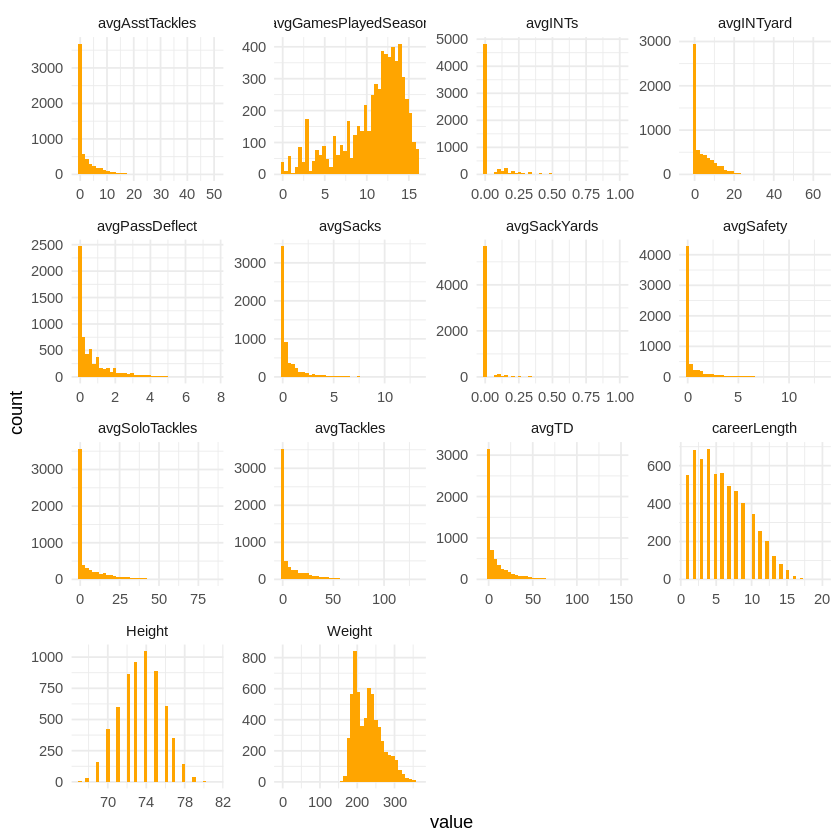

In [20]:
# Display all the numeric columns into histograms
master_df %>%
    keep(is.numeric) %>%
    gather() %>%
    ggplot +
    geom_histogram(mapping = aes(x=value),
                            fill = "orange",
                            bins = 40) +
    theme_minimal () +
    facet_wrap (~ key, scales = "free")

**Comment:** For most performance features, the distribution is heavily right skewed. Averages games played per season is left skewed. Height appears to have a normal distribution.

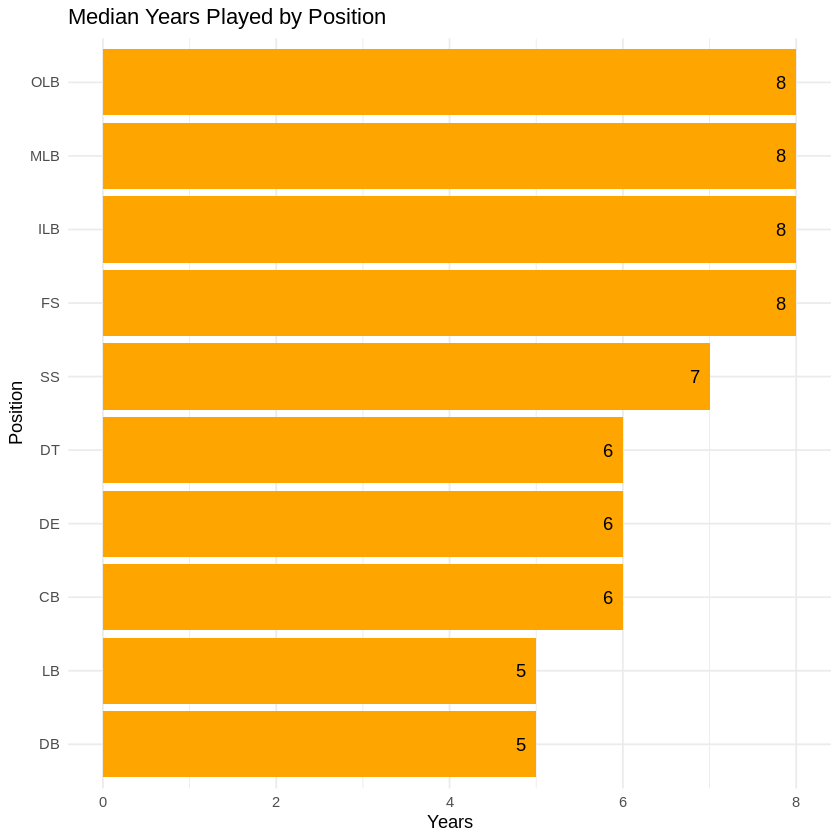

In [21]:
# Display bar chart of career lengths by defensive positions
medianCareerLength <- master_df %>%
  group_by(Position) %>%
  summarise(medianCareerLength = median(careerLength))

ggplot(data = medianCareerLength, aes(x = reorder(Position,medianCareerLength), y = medianCareerLength)) +
  geom_bar(stat = "identity", fill="Orange") +
  geom_text(aes(label = medianCareerLength, hjust = 2)) +
  theme_minimal() +
  labs(x = "Position", y = "Years",title= "Median Years Played by Position") +
  coord_flip()

**Comment** Specialized linebackers (ILBs, OLBs, MLBs) and Safeties (FS,SS) have longer median careers at 8 years than positions who play close to the line of scrimmage such as defensive ends and defensive tackles (DEs,DTs). Defensive backs and general linebackers have the shortest median careers at 5 years.

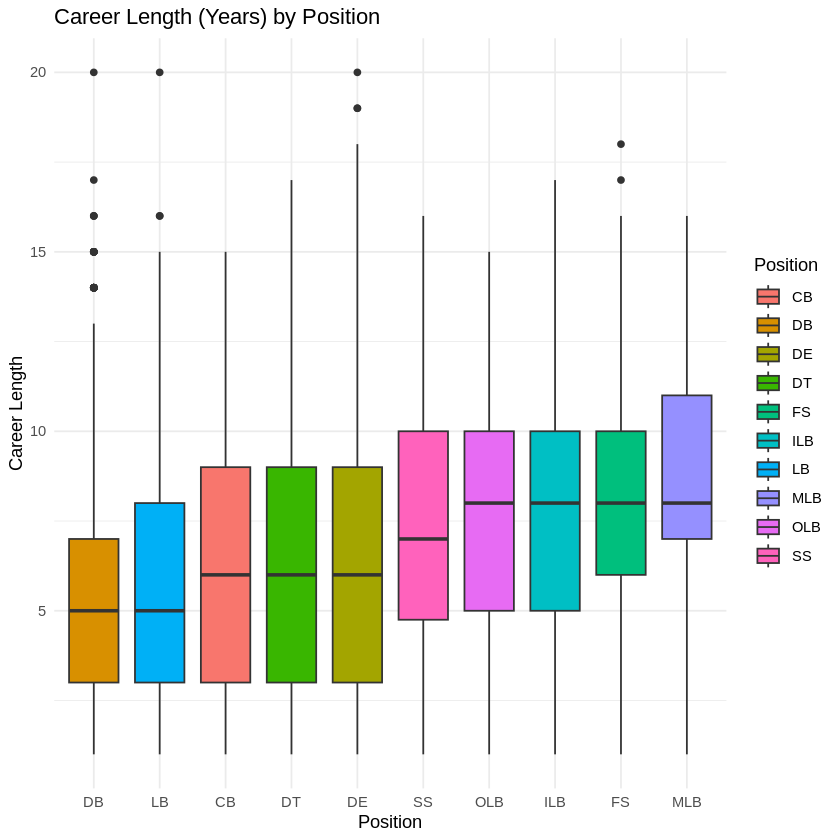

In [22]:
# Display boxplots of career lengths by defensive positions
ggplot(data = master_df, aes(x = reorder(Position,careerLength), y = careerLength, fill = Position)) +
  geom_boxplot() +
  labs(title = "Career Length (Years) by Position",
      x = "Position",y = "Career Length") +
  theme_minimal()

**Comment:**  No positions have a median career above 8 years. For most professional players who go into the league by age 22, this means they are usually done playing and out of the NFL when they start reaching their 30s. There are some instances where defensive players have careers up to 15-20 years though.

Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


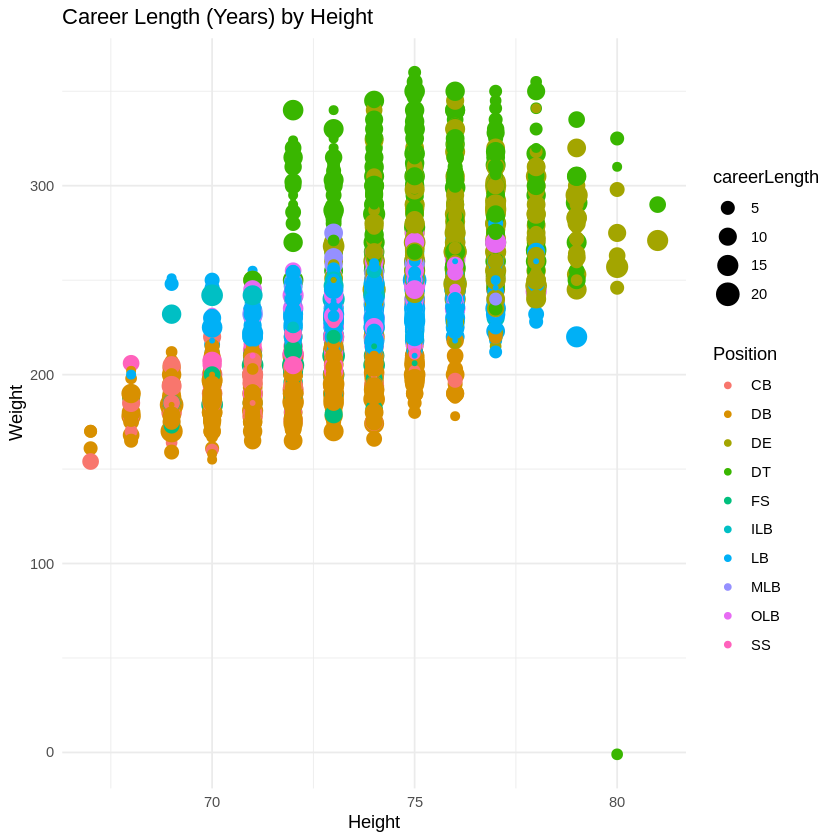

In [23]:
# Display Height vs. careerLength into scatterplot
ggplot(data = master_df, aes(x = Height, y = Weight, color=Position, size = careerLength)) +
  geom_point() +
  labs(title = "Career Length (Years) by Height") +
  theme_minimal()

**Comment:** Quicker and more agile positions, such as cornerbacks (CBs) and defensive backs (DBs), tend to have shorter and smaller athletes, while defensive ends and defensive tackles are typically taller and heavier. Although there is a slight positive correlation between height and weight, there is no discernible pattern when it comes to career length based on these physical features

# 6. Explore Correlations

In [24]:
# Creating a dataframe for just the numeric columns
df_numeric <- master_df %>%
    keep(is.numeric)

# Creating a matrix of correlations
corrs <- df_numeric %>%
    cor(use = "complete.obs")

# Displaying the features most highly correlated with our response variable
data.frame(corrs) %>% arrange(desc(careerLength)) %>% select(careerLength)

,careerLength
,<dbl>
careerLength,1.00000000
avgGamesPlayedSeason,0.56685792
avgSacks,0.35138248
avgPassDeflect,0.25076656
avgTD,0.21969423
avgSafety,0.20822684
avgINTs,0.20345998
avgTackles,0.19690676
avgSoloTackles,0.19543371


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.92 loaded



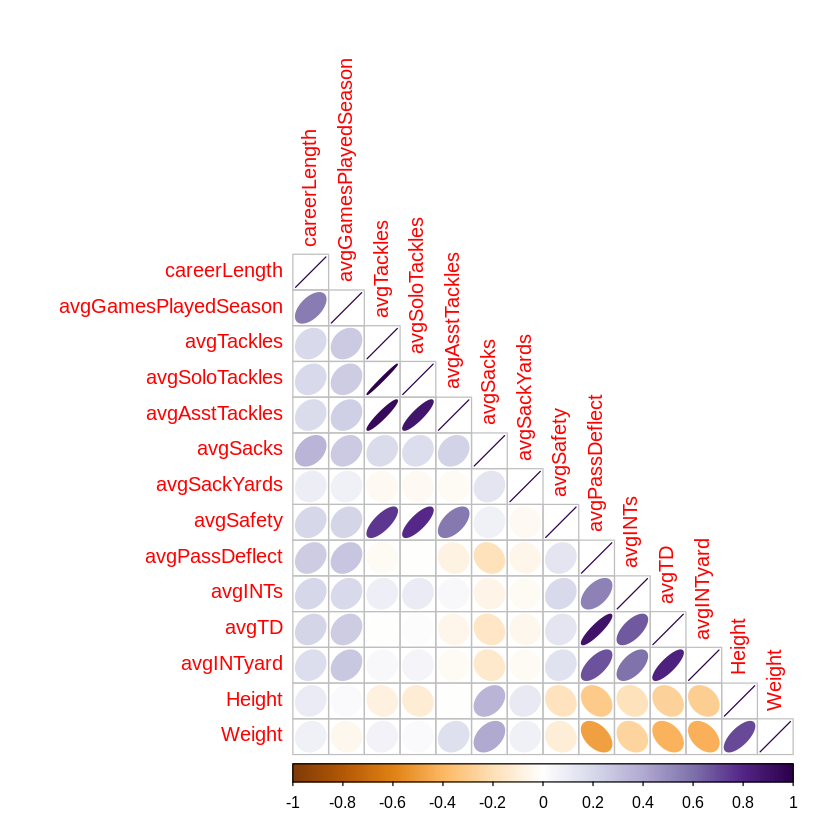

In [25]:
# reading and installing package
install.packages("corrplot")
library(corrplot)

# plot of correlations between each numerical column in our data set
corrplot(corrs, type = "lower", method="ellipse", col = COL2("PuOr"))

**Comment**: Here we have a plot of correlations between every one of our continuous variables in the data. The correlations that are more blue in color indicate a positive relationship, that is, the greater the value of one variable, the greater the value tends to be in the other variable. The correlations that are more orange in color indicate a negative relationship, that is, the greater the value in one variable, the less the other variable will tend to be. Correlations that are more white indicate little to no relationship between two variables. The statistics that are most strongly and positively related to a player's career length, and thus may be the best stats for us to use in our model, are the Average Games Played in a Season, Average Sacks and Average Passes Deflected.

# 7. Response Variable

For our response variable, we created a new field for our data set, **careerLength**, or the number of years that a player plays in his career. We chose this as our response variable because we felt that NFL General Managers would be interested in finding ways to predict how long they could rely on their team's players to last in the NFL. From a contractual perspective, knowing the right number of years to sign their players for is very important, and knowing when a player might be facing the end of their career could be very impactful in contract negotiations. Using the stats for the retired defensive players, we expect to build a model that can make accurate predictions for how many years a certain defensive player's career will last.

# 8. Simple Linear Regression

## Games Played Model

In [26]:
# fitting the model
gp_model <- lm(careerLength~avgGamesPlayedSeason, data = df_numeric)

# simple linear equation
paste("Predicted mean career length = " , coef(gp_model)[1][1], " + ", coef(gp_model)[2][1], "* (average games played)")

# model summary
summary(gp_model)

[1] "Predicted mean career length =  0.00736831058447645  +  0.547824698735212 * (average games played)"


Call:
lm(formula = careerLength ~ avgGamesPlayedSeason, data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.7726 -1.9100 -0.1563  1.8274 12.6518 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          0.007368   0.115955   0.064    0.949    
avgGamesPlayedSeason 0.547825   0.010167  53.882   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.939 on 6126 degrees of freedom
Multiple R-squared:  0.3215,	Adjusted R-squared:  0.3214 
F-statistic:  2903 on 1 and 6126 DF,  p-value: < 2.2e-16


In [27]:
# predictions on the original data set
head(predict(gp_model, df_numeric))

1        2        3        4        5        6 
7.403002 4.663878 1.239974 7.925925 5.896484 5.759528

**Comment**: This model fits a regression line between players' career length in years against their average games played per season. About 32.14% of the variation in players' career length can be explained by the linear relationship with average games played in a season given by the least-squares regression.

## Sacks Model

In [28]:
# fitting the model
sacks_model <- lm(careerLength~avgSacks, data = df_numeric)

# simple linear equation
paste("Predicted mean career length = " , coef(sacks_model)[1][1], " + ", coef(sacks_model)[2][1], "* (average sacks)")

# model summary
summary(sacks_model)

[1] "Predicted mean career length =  5.297393533542  +  0.912158398758139 * (average sacks)"


Call:
lm(formula = careerLength ~ avgSacks, data = df_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2264  -2.5516  -0.2974   2.3186  14.7026 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.29739    0.04763  111.22   <2e-16 ***
avgSacks     0.91216    0.03106   29.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.34 on 6126 degrees of freedom
Multiple R-squared:  0.1234,	Adjusted R-squared:  0.1233 
F-statistic: 862.6 on 1 and 6126 DF,  p-value: < 2.2e-16


In [29]:
# predictions on the original data set
head(predict(sacks_model, df_numeric))

1        2        3        4        5        6 
6.266562 5.297394 5.297394 6.955863 5.297394 6.209552

**Comment**: This model fits a regression line between players' career length in years against their average number of sacks per season. About 12.33% of the variation in players' career length can be explained by the linear relationship with average number of sacks per season given by the least-squares regression.

## Passes Deflected Model

In [30]:
# fitting the model
pd_model <- lm(careerLength~avgPassDeflect, data = df_numeric)

# simple linear equation
paste("Predicted mean career length = " , coef(pd_model)[1][1], " + ", coef(pd_model)[2][1], "* (average passes deflected)")

# model summary
summary(pd_model)

[1] "Predicted mean career length =  5.31097257678687  +  0.878942124692966 * (average passes deflected)"


Call:
lm(formula = careerLength ~ avgPassDeflect, data = df_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4636  -2.6040  -0.4868   2.4194  14.6451 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     5.31097    0.05336   99.53   <2e-16 ***
avgPassDeflect  0.87894    0.04339   20.26   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.454 on 6126 degrees of freedom
Multiple R-squared:  0.06277,	Adjusted R-squared:  0.06262 
F-statistic: 410.3 on 1 and 6126 DF,  p-value: < 2.2e-16


In [31]:
# predictions on the original data set
head(predict(pd_model, df_numeric))

1        2        3        4        5        6 
5.640576 5.310973 5.310973 6.030107 5.750444 5.310973

**Comment**: This model fits a regression line between players' career length in years against their average number of passes deflected per season. About 6.26% of the variation in players' career length can be explained by the linear relationship with average number of passes deflected per season given by the least-squares regression.

## Touchdowns Model

In [32]:
# fitting the model
td_model <- lm(careerLength~avgTD, data = df_numeric)

# simple linear equation
paste("Predicted mean career length = " , coef(td_model)[1][1], " + ", coef(td_model)[2][1], "* (average touchdowns)")

# model summary
summary(td_model)

[1] "Predicted mean career length =  5.46533601997281  +  0.0476860312702378 * (average touchdowns)"


Call:
lm(formula = careerLength ~ avgTD, data = df_numeric)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.3798  -2.5925  -0.4653   2.4345  14.4631 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.465336   0.051384  106.36   <2e-16 ***
avgTD       0.047686   0.002708   17.61   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.481 on 6126 degrees of freedom
Multiple R-squared:  0.04817,	Adjusted R-squared:  0.04801 
F-statistic:   310 on 1 and 6126 DF,  p-value: < 2.2e-16


In [33]:
# predictions on the original data set
head(predict(td_model, df_numeric))

1        2        3        4        5        6 
5.572630 5.465336 5.465336 5.989882 5.477258 5.465336

**Comment**: This model fits a regression line between players' career length in years against their average number of touchdowns per season. About 4.8% of the variation in players' career length can be explained by the linear relationship with average number of touchdowns per season given by the least-squares regression.

## Safeties Model

In [34]:
# fitting the model
safety_model <- lm(careerLength~avgSafety, data = df_numeric)

# simple linear equation
paste("Predicted mean career length = " , coef(safety_model)[1][1], " + ", coef(safety_model)[2][1], "* (average safeties)")

# model summary
summary(safety_model)

[1] "Predicted mean career length =  5.61142524299072  +  0.487071544948671 * (average safeties)"


Call:
lm(formula = careerLength ~ avgSafety, data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.4821 -2.6114 -0.6114  2.3886 14.3886 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.61143    0.04819  116.43   <2e-16 ***
avgSafety    0.48707    0.02907   16.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.489 on 6126 degrees of freedom
Multiple R-squared:  0.04382,	Adjusted R-squared:  0.04366 
F-statistic: 280.7 on 1 and 6126 DF,  p-value: < 2.2e-16


In [35]:
# predictions on the original data set
head(predict(safety_model, df_numeric))

1        2        3        4        5        6 
5.611425 5.611425 5.611425 7.072640 7.925015 5.611425

**Comment**: This model fits a regression line between players' career length in years against their average number of safeties per season. About 4.37% of the variation in players' career length can be explained by the linear relationship with average number of safeties per season given by the least-squares regression.

# 9. Multiple Linear Regression

## Multiple Regression Model 1

In [36]:
# fit the multiple regression model
mreg1 <- lm(careerLength~avgGamesPlayedSeason + I(avgGamesPlayedSeason^2), data = df_numeric)

# model summary
summary(mreg1)


Call:
lm(formula = careerLength ~ avgGamesPlayedSeason + I(avgGamesPlayedSeason^2), 
    data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.5344 -1.7503 -0.1808  1.7628 12.5807 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.41796    0.19158   7.401 1.53e-13 ***
avgGamesPlayedSeason       0.14163    0.04523   3.131  0.00175 ** 
I(avgGamesPlayedSeason^2)  0.02285    0.00248   9.213  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.919 on 6125 degrees of freedom
Multiple R-squared:  0.3308,	Adjusted R-squared:  0.3306 
F-statistic:  1514 on 2 and 6125 DF,  p-value: < 2.2e-16


In [37]:
# predictions on the original data set
head(predict(mreg1, df_numeric))

1        2        3        4        5        6 
7.494890 4.272935 1.852320 8.239883 5.581414 5.424601

**Comment:** In this multiple linear regression model, we use 'avgGamesPlayedSeason' and a squared term for 'avgGamesPlayedSeason' to show the relationship between these variables and career length in years. About 33.06% of the variation in career length can be explained by the linear relationships of these varaibles.

## Multiple Regression Model 2

In [38]:
# fit the multiple regression model
mreg2 <- lm(careerLength~avgGamesPlayedSeason + avgSacks + I(avgGamesPlayedSeason^2) + avgGamesPlayedSeason:avgSacks + I(avgSacks^2), data = df_numeric)

# model summary
summary(mreg2)


Call:
lm(formula = careerLength ~ avgGamesPlayedSeason + avgSacks + 
    I(avgGamesPlayedSeason^2) + avgGamesPlayedSeason:avgSacks + 
    I(avgSacks^2), data = df_numeric)

Residuals:
   Min     1Q Median     3Q    Max 
-9.090 -1.783 -0.238  1.681 12.819 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    1.163549   0.186599   6.236 4.80e-10 ***
avgGamesPlayedSeason           0.267420   0.044512   6.008 1.99e-09 ***
avgSacks                      -0.218312   0.163882  -1.332 0.182867    
I(avgGamesPlayedSeason^2)      0.011303   0.002516   4.493 7.17e-06 ***
I(avgSacks^2)                 -0.036374   0.009889  -3.678 0.000237 ***
avgGamesPlayedSeason:avgSacks  0.073020   0.013491   5.413 6.45e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.827 on 6122 degrees of freedom
Multiple R-squared:  0.3726,	Adjusted R-squared:  0.3721 
F-statistic: 727.2 on 5 and 6122 DF,  p-

In [39]:
# predictions on the original data set
head(predict(mreg2, df_numeric))

1        2        3        4        5        6 
7.607993 4.253238 1.822464 8.792355 5.344481 5.729602

**Comment:** In this multiple linear regression model, we use 'avgGamesPlayedSeason', 'avgSacks', squared terms of both variables, as well as their interaction term to show the relationship between these variables and career length in years. About 37.21% of the variation in career length can be explained by the linear relationship of these variables.

## Multiple Regression Model 3

In [40]:
# fit the multiple regression model
mreg3 <- lm(careerLength~avgGamesPlayedSeason + I(avgGamesPlayedSeason^2) + I(avgGamesPlayedSeason^3) + I(avgGamesPlayedSeason^4), data = df_numeric)

# model summary
summary(mreg3)


Call:
lm(formula = careerLength ~ avgGamesPlayedSeason + I(avgGamesPlayedSeason^2) + 
    I(avgGamesPlayedSeason^3) + I(avgGamesPlayedSeason^4), data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0966 -1.6608 -0.2054  1.7818 12.1377 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                1.9228510  0.3429655   5.607 2.15e-08 ***
avgGamesPlayedSeason       0.6159264  0.2408016   2.558   0.0106 *  
I(avgGamesPlayedSeason^2) -0.2476420  0.0538088  -4.602 4.26e-06 ***
I(avgGamesPlayedSeason^3)  0.0336638  0.0046554   7.231 5.37e-13 ***
I(avgGamesPlayedSeason^4) -0.0012048  0.0001367  -8.814  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.869 on 6123 degrees of freedom
Multiple R-squared:  0.3539,	Adjusted R-squared:  0.3535 
F-statistic: 838.4 on 4 and 6123 DF,  p-value: < 2.2e-16


In [41]:
# predictions on the original data set
head(predict(mreg3, df_numeric))

1        2        3        4        5        6 
7.912057 3.650563 2.407571 8.156117 5.656183 5.412775

**Comment:** In this multiple linear regression model, we use 'avgGamesPlayedSeason' and polynomial terms up to the 4th degree to show the relationship between career length and higher polynomial terms of 'avgGamesPlayedSeason'. About 35.35% of the variation in career length can be explained by the linear relationship of these variables.

## Multiple Regression Model 4

In [42]:
# fit the multiple regression model
mreg4 <- lm(careerLength~avgGamesPlayedSeason + avgSacks + avgPassDeflect + avgTD + avgSafety, data = df_numeric)

# model summary
summary(mreg4)


Call:
lm(formula = careerLength ~ avgGamesPlayedSeason + avgSacks + 
    avgPassDeflect + avgTD + avgSafety, data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3947 -1.7608 -0.1955  1.6130 13.6583 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.395416   0.110282   3.586 0.000339 ***
avgGamesPlayedSeason  0.420159   0.010729  39.161  < 2e-16 ***
avgSacks              0.684717   0.027861  24.576  < 2e-16 ***
avgPassDeflect        0.729625   0.081029   9.004  < 2e-16 ***
avgTD                -0.009655   0.004919  -1.963 0.049697 *  
avgSafety             0.175010   0.023730   7.375 1.86e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.771 on 6122 degrees of freedom
Multiple R-squared:  0.3974,	Adjusted R-squared:  0.3969 
F-statistic: 807.3 on 5 and 6122 DF,  p-value: < 2.2e-16


In [43]:
# predictions on the original data set
head(predict(mreg4, df_numeric))

1        2        3        4        5        6 
7.046961 3.966769 1.340774 8.729353 6.105822 5.491804

**Comment:** In this multiple linear regression model, we use the top 5 highest correlated features of career length — which are 'avgGamesPlayedSeason', 'avgSacks', 'avgPassDeflect', 'avgTD', and 'avgSafety' — to show the relationship between these variables and career length in years. About 39.69% of the variation in career length can be explained by the linear relationship of these variables.

## Multiple Regression Model 5

In [44]:
# fit the multiple regression model
mreg5 <- lm(careerLength~avgGamesPlayedSeason + avgSacks + avgPassDeflect + avgTD + avgSafety + avgINTs, data = df_numeric)

# model summary
summary(mreg5)


Call:
lm(formula = careerLength ~ avgGamesPlayedSeason + avgSacks + 
    avgPassDeflect + avgTD + avgSafety + avgINTs, data = df_numeric)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6140 -1.7538 -0.1782  1.6176 13.6881 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)           0.406001   0.110092   3.688 0.000228 ***
avgGamesPlayedSeason  0.418445   0.010714  39.055  < 2e-16 ***
avgSacks              0.682480   0.027811  24.540  < 2e-16 ***
avgPassDeflect        0.794205   0.081923   9.695  < 2e-16 ***
avgTD                -0.022583   0.005563  -4.060 4.97e-05 ***
avgSafety             0.159117   0.023902   6.657 3.04e-11 ***
avgINTs               2.011021   0.406882   4.943 7.92e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.765 on 6121 degrees of freedom
Multiple R-squared:  0.3998,	Adjusted R-squared:  0.3992 
F-statistic: 679.4 on 6 and 6121 DF,  p-value: < 2.2e-16


In [45]:
# predictions on the original data set
head(predict(mreg5, df_numeric))

1        2        3        4        5        6 
7.027162 3.962786 1.347503 8.574055 6.051552 5.482156

**Comment:** In this multiple linear regression model, we add 'avgINTS' to the list of predictors from Model 4 to show the relationship between the top 6 highest correlated features  and career length in years. About 39.92% of the variation in career length can be explained by the linear relationship of these variables.

# 10. Findings

In today's highly competitive NFL landscape, making informed decisions about player contracts and roster management is crucial for general and team managers. This report is to provide valuable business insights, specifically focused on predicting the career length of NFL defensive players.

**Analysis Process:**
We obtained two CSV files (from Kaggle) of retired NFL players that contained various data ranging from physical stats such as height and weight to performance stats including number of tackles, sacks, safeties and etc. Analyzing past data of retired players shedded light into how to manage current and upcoming defensive players in a smarter and more efficient way that prolongs player development.

After an initial data cleaning phase, we removed unwanted columns and created averages for each field. By doing so, we transformed a pre-existing field into 'careerLength' which represents the number of years a player's career spans. This metric holds a key importance for NFL teams, and was used as our target variable.

**Insight #1: Past data shows median careers ranging from 5-8 years.**
During the visualization phase, we found out that different defensive positions have differences in their median career lengths. In the boxplot below (Figure 1), the highest median career lengths of 8 years can be seen in specialized linebackers and safeties. However, we also found some occurences of career lengths as high as 20 years.

**Insight #2: Performance data over physical traits.** We were able to determine the features that we would use as predictors in our models from the correlation plot below (Figure 2) which shows the correlations between each continuous variables in the data. By focusing on 'career lengths', we found the highest correlated features are 'Average Games Played per Season', 'Average Sacks', and 'Average Passes Deflected'.

**Insight #3: Average Games Played most correlated feature.** Our analysis using simple linear regression demonstrates that player statistics like 'Average Games Played per Season', 'Average Sacks', and 'Average Passes Deflected' significantly influence a player's career length more than the other features. The best model using simple linear regression was the 'Games Played Model' which had the highest accuracy and explained approximately 32.14% of the variation in career length.

**Insight #4: Improved predictions with multiple features.** To gain a deeper and a more complex understanding, we explored multiple linear regression models that considered combinations of performance statistics. The most promising models were Models 4 & 5. Model 4 consisted of using the top five correlated variables: 'Average Games Played per Season', 'Average Sacks', 'Average Passes Deflected', 'Average Touchdowns', and 'Average Safeties'. This model explained approximately 39.69% of the variation in career length. We then expanded Model 5 to include 'Average Interceptions' which further improved prediction accuracy to approximately 39.92% of the variation in career length.

**Recomendation #1: Implement model using performance data.** For team/general managers, we'd like to recommend that they prioritize player statistics such as 'Average Games Played per Season', 'Average Sacks', 'Average Passes Deflected', 'Average Touchdowns', and 'Average Safeties' when making contract decisions and managing rosters. We believe these metrics strongly influence a player's career length more than other factors that we have analyzed.

**Recomendation #2: Gain access to new data to enhance predictions.** In addition, we'd recommend that managers leverage our regression models, particularly Model 5, for making predictions on career length in the future. Using data to make informed decisons enhances the ability to unlock insights about player investments. We would also like to recommend that the team managers find new performance data to update into our existing models which will indeed make it more robust.

However, it is understandable that finding new data pipelines always takes time and resources and can be met with hesitation from an investment stand-point. Therefore, in the short-term, here are some things that we can do as data scientists to see improvements in the future: optimize current models, improve feature selections, and apply machine learning algorithms to our models.

## Figure 1: Boxplot of Career Length by Position
<div>
<img width = "500" src ="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAA0gAAANICAIAAAByhViMAAAACXBIWXMAABJ0AAASdAHeZh94AAAgAElEQVR4nOzdd3xTZf//8StNk7Tppi0yykbZS6qU8pUNQkEEUZAhFLgRRAQUUBAUZMsQcIEFEZRbEGTeCCJLGbIdIDIEBMqoUArdaebvj/O7c8eOkKYZzfH1fPjwQa5c51yfq02bd885uY7CYrEIAAAA+D4/bxcAAAAA1yDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHe+bMmaNQKObPn+/c5hcuXIiIiIiPj9fr9a4tzB1mz56tUCg+/vjjB/acPHmyQqH48MMPPVCVW02YMEGhUCxdutTpDgCAUsXHgt3t27ffeeed5s2bR0dHazSamJiY+Pj4+fPn37lzx9ulOeOXX35RKBQ1a9b0diH/88UXX2zdutUlu9LpdD169BBCrF+//vTp0yqVKiws7Pr164V2/vTTTxUKRf369b0YASdOnJiQkDB69Ohjx455pQDp9ZCPWq2OiYnp1avXgQMHXD5iRERElSpVQkJCrC35XgAFOwAASjWL71i1apVWqxVCqFSq2NjYDh061K1bV61WCyEiIiJ27tzp7QKL7eeffxZC1KhRw9uF/E+5cuWGDBlifTh79mwhxLx585zY1YQJE4QQS5culR5OnDhRCNG1a9eCPW/duhUREaFUKo8fP+5c2a5y/fp1rVZbp04dg8Fgp9ukSZOEEB988IFrR5deD8HBwb1tdOjQoVKlSkIIhUKxePFi145YUL4XAADAt/jMEbu1a9cOHDhQp9NNmjQpNTX1+PHj33333ZkzZ5KTk0eNGnXv3r2EhATpfRFOu3z5ckpKikt2lZycvHDhwkqVKg0ePFhqmTp1ar169bZt27Z27dp8nUeOHHnv3r033ngjNjbWJaM7rWLFiqNGjTp79uzy5cu9VcNDDz201sZ333135coVKUSOHz8+OTnZfUO78AUAAPAObydLh2RkZISHhwshlixZUmiHN954Qwjx4osvWlvS09MnTJhQu3btgIAAtVpds2bNcePGpaenWzu8+eabQogtW7Z89NFHFSpUCAsLk9rNZvOyZcvi4uKCg4MDAgJq1649efLkrKws2+Ee2Keonefj4BG7Bw43efJkabjffvute/fu0nnqRo0affnll7b7uXr1ap8+faKiogIDA2NjYzds2HD37l0hxOOPP26xWHr27Gn7wmjRooXlv0fs3nvvvTNnznTp0iU8PDwgIKBRo0Zr1661X/P48eNFgWNax44dUyqV0dHRqamp1sZNmzYJIerVq5eXl+fgfC0l+P6uX7++TZs2ERERKpWqfPnynTp12r59u+2eb9y44e/vX7NmTbPZXNTspCN2H3300d69e1u2bBkSEhIUFNSiRYtdu3ZJHVq0aCGE2LZtW74N9+3bZ/3aFmT/9dC2bVthcwTUYrHo9fpFixbFxsYGBwdrNJoaNWq8/PLLN27csN3K/nylHxzpx6rQF4BtBwcHdfDVCABwB98IdtL17LGxsUV1yM3NvXr1qvWhXq9/4oknhBBNmzYdN27c6NGja9WqJYR47LHHjEaj1Gfq1KlCiNdee02r1fbp02fo0KFSe//+/YUQ5cuXHzt27JtvvhkXFyeEaNy4cUZGhnX/D+xT1M7zcTDYPXC4adOmCSGmTp0aFhbWsWPHV199tUuXLtLb8549e6Q+qamp0hm9Fi1aTJkyZciQIQEBATNmzBBCtGzZ0mKxbNu2LTExUQgRFxe3cOHCdevWWf4b7MaOHRseHt6xY8exY8d269ZNCKFQKHbv3m2n5mrVqikUijt37uRrl4JC//79pYf379+vUKGCUqk8duyY4/N1+vublJQkhIiOjh42bNhbb701ePDgMmXKKBSKzz//3LbI9u3bCyEOHTpU1OykYDd06FCNRtOpU6fXXnvt6aefVigU/v7+33//vcVikQ749ezZM9+GL730Ur5wZsv+62H48OFCiGnTpkkPTSZT586dhRC1a9cePXr0W2+9JT0sX778lStXpD4PnK9tbiv0BZAv2DkyqCOvRgCAm/hGsJOOJSxYsMDB/hs2bJDen6xv83l5ebVr1xZCbN26VWqZNWuWECIsLMz24ryvvvpKigvWDGE2m0eOHCmEmDBhguN9Ct15QY4EO0eGk+KXWq3+4osvrBuOGzdOCDFw4EDpoZRFnnvuOWuHQ4cOBQYGCiFatWoltaxfv14IUfAau3x7fv3114UQAwYMKKrmP/74Q4piBZ/S6XR16tQRQuzYscNisQwdOlQIMXHixGLN1+nvb4MGDYQQFy9etLYkJyeHhITExcXZFvnee+8JId56662iJih9Mf38/LZs2WJtnDdvnvVAV0ZGhlarVavVtscmjUZj2bJlNRrNvXv3Ct2t/ddD69athRArVqyQHkqhrXnz5jqdztpHOlrWq1cvB+ebL7cVfAHk6+DIoI68GgEAbuIbwa5JkyZCiO+++87B/n/++efGjRvzXYkvvUXNmDFDeii9/eR7R5cO1eQb6N69e9JpLMf7FLrzghwJdo4Pl+8E39GjR6X3YOlhw4YNhRC2B8YsFsugQYMcCXbSIT2rw4cP225VkHS8atSoUYU+e+TIEaVSWbly5f/85z8KhaJu3bq2KcGR+Tr9/a1UqZJCobh165Zto/UUsNX3338vhEhISChqglKwy7fz3NzcgIAAhUJx9+5di8XywgsvCCHef/99a4ddu3YJIZ599tmidlvU68FsNksLjgQFBd2+fVtqlM725juPnJ6erlar1Wp1Tk6OI/MtbrBzZFBHXo0AADfxjQ9PZGZmCiEcX3OhatWqPXr0kK7Ez8zMTElJSUlJkT5Rm5uba9uzefPmtg+PHDkihIiPj7dtDA8Pr1+//q1bt65du+Zgn0J37hzHh5NOWVpFRESI/87XbDafO3fOz8+vcePGtn2s58jsy7fnMmXKCCHS09OL6n/jxg0hRExMTKHPNmvW7LXXXrt27Vr37t39/PxWrlyp0WiszzoyX6e/v0899ZTFYmnTps2KFSusnxKQPlhtq0KFCkKImzdvFjVByf/93//ZPpQuB7RYLOfPnxdCSKF55cqV1g7r1q0TQkiBz46//vrreRsJCQk1atQYPny4SqVavnx5dHS0EMJisZw8eVIU+EKFhobWqlVLr9efOXPG8fk6yMFBJXZejQAA9/H3dgEOCQ0NFULcu3fP8U02b948f/78kydP6nQ6O92kt0lJbm5uVlaWECI4OLjQzjdu3IiOjn5gn8qVKxfcuXMcKck6XLly5WyfUigUQgiLxSKEyMrK0uv1YWFhKpXKtk+VKlUcKSPfRPz8/Kx7LpT0mYzIyMiiOkybNm3Tpk0XL14cN27cY489Zm13fL5OfH+FEIsWLTKZTCtWrBgyZIgQom7dul27dh0+fHi1atVsu0VFRQkhUlNT7exZCFG+fPl8LVLklV6orVu3rlat2k8//XT69OkGDRoYjcaNGzdGRUVJF6XZkZWVJZ2Plvj7+z/00EP9+vUbN26cNZdnZWXpdDq1Wh0WFlbolKXiHZyvgxwcVGLn1QgAcB/fCHa1atX66aefTpw48cA3RUlSUtKwYcNCQkKGDx/++OOPh4WF+fn5bd68+ZNPPsnX0zboSO89CoXi7bffLnS35cqVc6RPoTt3TrGGs0N6Q5X2VnD/LicdzJPieKECAgLq1at38eLFpk2bFqzngfN17vsrPVy6dOmUKVO2bt26Y8eOvXv3zp07d9GiRV988UWvXr2s3aSPYN+/f9/+NJVKZb4WqX4p+CoUigEDBrzzzjsrV65csGDB7t277969+8orrzzwVVGjRo2LFy/a72MnJ5nNZmsHB+frIAcHBQB4kW8Eu/bt269Zs2bVqlUTJ0709y+kZovFMmPGjOeee066gl76XN62bdtatmxp7SNdGWZHQEBAWFhYenr6yy+/bOdgmyN9XMXBkh4oODhYqVRmZmaaTCbbOOKmRdGkSJeRkVHcDR2cr3PfX6vy5csPGzZs2LBhOp1u5cqVr7zyyrBhw55++mnrGWEpmErxzo6Ch/SkQ5XScTshRGJi4rRp07766qv58+d/+eWXQogBAwY4WKR9wcHBWq02Jyfn/v37+eqU7sJi+9V74HzdMSgAwCt84xq7Pn36lC1b9tKlS9JF6wXNmjXr7bffls435eXl3bhxIzg42PZd32KxfPvttw8cqFmzZkKI/fv352tPS0srVh8XcslwSqWyWrVqJpPp3Llztu2OfE2cIJ2ElVJOcT1wviX5/l69evXWrVvWhwEBAcOHD4+Pj79///7ly5et7VJMkU7I2iF9IMAqLy/v/Pnzfn5+0l8XQoiqVau2bt36xo0b33777aZNm+rUqePCFZilXR06dMi2MS0t7fz584GBgfXq1RMOz9e1gwIAvMg3gl1gYKB0L9G5c+cOHjzYdnH8lJSUl19+efLkyaGhodKHMTUaTZkyZbKysqyHoywWy7Rp06Tr7u2fX5Oi4dSpU21vPnvgwIGHHnroueeec7yPC7lquCeffFII8cEHH1hbjh07Jh1GsgoICBDOBjJbFStWFA58+KBQD5yv09/fX3/9tWrVqv3797e9HW1mZubly5eVSmXZsmWtjVIYKngJXT579uz58ccfrQ+XLVuWm5vbpk0b23PQ0spwL7/8clZW1gM/NlEs0hdq1qxZttOZNWuW0Wjs16+fRqNxfL5WD3wBPHBQV8wMAOA83zgVK4To2rXr+vXrBw8e/Nlnn61atapBgwZly5a9devWhQsX9Hp9pUqVvvnmG2mBNCFEYmLie++9165du4EDBwohtm3bdu/evVWrVj355JNr166tVKlSv379Ch2lV69emzdvXrNmTZMmTXr37h0SEvLbb79t3bo1MDBQupWCg32K5datW127di3Y3rdv3759+7pquHHjxq1evfqTTz65evXq448/fvXq1Y0bN06ePFlaz0JSp04dhULxzTffDBkyRK1WL1myxInpCCFatWolCjvq5ghH5uvc97dRo0Z9+/b98ssv69Sp07lz58jIyNTU1G+++eb69eujR4+2/ajHTz/9JIR49NFHiyrSaDQKIYYMGdK5c+cePXpUr1797Nmz69ev12g0M2fOtO357LPPjhw58s8///Tz85MWXnaVF154YePGjVu2bGnatGnnzp1VKtXRo0f37NnzyCOPzJkzp1jztXrgC+CBgwIAvMzzK6yURGpq6rRp0+Li4qKiovz9/SMiIlq2bLl8+fLc3Fzbbrm5uZMmTapRo4ZGo6lUqdKIESOkdWITExODgoLKlSt36tSpom5vbzKZli1b1rx585CQEH9//5iYmAEDBpw9e7ZYfYraeT72b247ZcqUkgwnrRLcqFEj2+E6dOgQEhISGhraqlWrvXv3nj59WgjRunVra585c+ZERUVpNJpHH33U8T0XVKVKFT8/P2lFt0I9/fTTQog1a9YUfOqB83X6+2symT766KP4+PioqCilUhkWFvbEE0+sWLEi393DpKObBw4cKKr4MWPGCCHWr1+/b9++li1bBgcHBwUFtWrVqtBNpKNcbdu2Lfqr9f85eCcSK4PBsGjRokcffVSr1Wo0mtq1a0+cONF29eMHzrfgHcPyvQAKdnjgoE6/ZgAAJaewsADBP9jRo0fj4uK6dOmybds21+55/Pjx8+fP//jjj6WbaPmQlJSUypUrV6pU6Y8//pA+31pCs2fPfvPNN7/44gvXHrEDAKAg37jGDiX3119/bd++/dSpU7aN0iEi51Y1s++VV17RaDTvvvuuwWBw+c7d6sMPPzQYDGPHjnVJqjMYDEuWLImKinLH9ZcAAORDsPun2LVrV5cuXV566SVr0kpPT1+wYIEQotAr/EqocuXKo0ePvnr1qu2tF0q/mzdvLlq0qFatWtJNbEvu9ddfT05OHjVqFB8sAAB4AKdi/yn0en27du0OHjxYr169hISEnJycLVu2XL9+vUePHhs3bnTHiLm5uU2bNk1JSfntt9+km3SVfl27dt25c+fBgwelVVecdu7cuZUrVx46dOjgwYONGjU6fPhwYGCgq4oEAKAoBLt/kMzMzIULF65bt+7q1asmk6lWrVr9+vUbM2ZMoWs+u8T58+fj4uLq1q27b98+p29R6jFz5syZOHHiRx99NGLEiBLuau/evR06dNBqtU899dTixYtZuRcA4BkEOwAAAJngGjsAAACZINgBAADIBMEOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBLtCWCyW9PT0nJwcbxdSIiaTKT09XafTebuQEjEajenp6Xl5ed4upET0en16err1Lr0+SqfTpaenG41GbxdSIrm5uenp6Waz2duFlEh2dnZ6erqvLy+flZWVkZHh7SpKKjMzMzMz09tVlFR6enp2dra3q4BruOteUj7NYrEYDAaFQuHtQkpEmoVSqfR2ISViNpsNBoNKpfJ2ISUizcLXw4Q0C18PEyaTSTaz8HYVJWU0Gk0mk7erKCkZvFkIIWTwcoIVR+wAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmfB3697T0tJWrFjx66+/6vX66tWrDxo06JFHHhFCZGVlJSUlnTp1ymAw1KpVa/jw4WXLlnVrJQAAALLn3iN2M2bMSE1NfeeddxYtWhQVFTVt2jSdTieEWLRo0e3bt6dMmTJv3jytVjtt2jSz2ezWSorl559/3rJly65du+7cuePtWpxksViOHTu2adOmvXv3pqene7sc+LysrKy9e/du2rTp8OHDpeqnFQBgy41H7DIzM6Ojo/v371+pUiUhxIABA3744Yfk5OSIiIjjx48vXLiwWrVqQojhw4e/8MILp0+fbtSokfuKcVBeXt748eN//PFH6eHixYsnTJiQkJDg3aqKKz09fcyYMadPn5YehoaGTp8+vUWLFt6tCr7rxIkTb775ZlpamvSwVq1aixYtio6O9m5VAICC3HjELiQkZOLEiVKqE0LcvXvXz88vKirqjz/+UKlUUqoTQgQHB8fExJw/f959lTjugw8+sKY6IUROTs7MmTMvX77sxZKcMGvWLGuqE0JkZGRMnjzZd48+wrsyMjJsU50Q4vz581OnTvVeRQCAIrn3GjurzMzMDz74oHv37hERERkZGSEhIQqFwvpsWFiYndOFOp3OZDJ5oEiLxbJly5Z8jXl5eVu3bh06dKgHCnCJrKysffv25WvMzMzcuXNnjx49vFJSSUjfer1eb7FYvF2L86RZ5OXlGY1Gb9dSbHv27LFNdZKjR4/++eefvnhprPQtyM3Ntf0V5HOkV1ROTo63CykR6Zx+dna2twspEYvFYrFYfH0WQgiTyeT5WWg0Gn9/D+WQfw5PfEGvX78+ffr0xo0bDxw4UGop1q/UvLw8g8HgntL+Rq/X5+bmFmxPTU0ttL10unPnTqGXQN25c8eHZpGP0Wj0xUiUj16v93YJzkhNTS20PSUlJSQkxMPFuIp0sa+v892faFvMopQwm82en4VSqSTYuZzbv6C//vrr3Llz+/Tp07VrV6klPDw8IyPDYrFY4116enpERERRewgKCvLY0Zro6OiCpyxr1KgRFhbmmQJKLjAwMCAgoOD71sMPP+xDs7AyGo3Z2dkajSYgIMDbtThP+ptBq9WqVCpv11JsNWvWLNioVCofeeSR0NBQz9dTQrm5uXq9PiQkxM/Phxd7ysnJMRgMoaGhPn3cMSsry2w2++KryFZmZqYQwnf/yJGkp6f7+/sHBQV5eFylUunhEf8J3Bvsfv/993fffXfs2LFNmza1Nj788MMGg+HSpUvSG0ZGRkZycnKdOnWKLNGDcX748OHTp0+3bXnooYd69uzpQ+/HKpUqMTFx6dKlto01a9bs2LGjD83CSsr0SqXSF4u3kk6c+egsWrZs2aBBA9urNoUQffv2jYyM9FZJJZGXlyeE8Pf39+l3FCnPqVQqnw521ll4u5CSUigUzAKlh9J9F0Hr9fq33367U6dOjz76aM5/+fn5hYSEXL16dd++fbVq1crJyfn444+DgoL69etXGn5D1a5dOzg4WFpgTwjRsGHD2bNnly9f3tt1FU/jxo0tFsuZM2ekPNG8efMZM2aEh4d7uy5nmEymvLw8lUrl079xjEajXq/30atJ/Pz84uPjr1+/fvXqVSGESqXq37//iBEjfDQY6fV6o9EYGBjo00fs8vLyTCaTVqstDb82nabT6SwWi1ar9XYhJSJdrxkYGOjtQkokJydHqVT69IkRWCncd5bz119/feutt/I1Dhs2rEuXLjk5OUlJST///LPJZKpXr97w4cPtnIr1PIPBcObMmYiIiCpVqni7Fufl5ub+/vvvFSpU8Llgakuv12dkZGi1Wp/+7a/T6bKyskJCQjQajbdrcd6dO3euXbtWu3Ztz5+vcaGsrCydThcREeGjwVSSkZGh1+sjIyN9Otjdv3/fZDL56KFfq7S0NIVCUarewpyQmpqqUql88XIdFOTG4weNGjXaunVroU9ptdoxY8a4b+gSUiqVMTExarXa24WUiEqlqlKlCn+BwVWCgoKqVKni6z8XACBvPnwyAgAAALYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdgAAADLh7+0CAPiA06dPL1++/Pbt2zVq1HjttdfKlCnj7YoAAIUg2AF4gEWLFq1evVr69x9//PHdd9+9//77cXFx3q0KAFAQp2IB2HPhwgVrqpOYzeZx48Z5qx4AgB0EOwD2rF27tmCjTqc7ceKE54sBANhHsANgT0ZGRqHtqampHq4EAPBABDsA9jRs2LDQ9tjYWA9XAgB4IIIdAHv69+8fHh6erzE+Pj4qKsor9QAA7CDYAbDHz8/viy++qFmzpvRQqVS2bdv2vffe825VAIBCsdwJgAcoX7782rVrc3Jyrl+/Xq1aNZVK5e2KAACF44gdAEexLjEAlHIEOwAAAJkg2AEAAMgEwQ4AAEAmCHYAAAAyQbADAACQCYIdAACATBDsAAAAZIJgBwAAIBMEOwAAAJkg2AEAAMgEwQ4AAEAmCHYAAAAyQbADAACQCYIdAACATBDsAAAAZIJgBwAAIBMEOwAAAJkg2AEAAMgEwQ4AAEAmCHYAAAAyQbADAACQCYIdAACATBDsAAAAZIJgBwAAIBMEOwAAAJkg2AEAAMiEv7cLAADA95hMpm3bth07dszPzy8+Pv7JJ5/08+NYCbyPYAcAQPHo9fphw4adPn1aerhjx47t27cvXryYbAev4yUIAEDxrFixwprqJIcPH167dq236gGsCHYAABTP/v37HWwEPIxgB8Ah69atS0xM/PXXX71dCOB9er3ewUbAwwh2ABySmZmZkpKSl5fn7UIA76tbt66DjYCHEewAACieESNGhIaG2rZER0cPGTLEW/UAVgQ7AACKp1y5cp999lnbtm3Dw8PLlCnTqVOnFStWREREeLsugOVOAAAovipVqsydOzctLU2hUBDpUHpwxA4AAEAmCHYAAAAyQbADAACQCYIdAACATBDsAAAAZIJgBwAAIBMEOwAAAJkg2AEAAMgEwQ4AAEAmCHYAAAAyQbADAACQCYIdAACATPh7u4AHMxgMZrPZkyNaLBYhhNlszsvL8+S4rmUymaT/+/QsjEaj9H95zMLbhZSI9HPh668o6edCr9f7+fnwn7XSr8S8vDyFQuHtWpwnvaJ8+uUk5DIL4aW3PH9/f6VS6eFBZc8Hgp3JZJJ+F3uMNdj59Dux9Kvf12chfet9fRbS98LDL2OXk8fPhTWeevjPRdeyzsLbhZSINAuffjlJLBYLs3AOqc4dfCDYBQQEeHhEs9ms0+n8/f2DgoI8PLQLSUe5VCqVT89Cr9fr9Xq1Wq3Var1di/N0Op1er9doNBqNxtu1OE86xOXrr6isrCyj0RgYGOjT7yjSn7tardanj9gZDAaTyeTTLyfx3+Omvj6L3NxcpVLp67OAxIdPRgAAAMAWwQ4AAEAmCHYAAAAyQbADAACQCYIdAACATBDsAAAAZIJgBwAAIBMEOwAAAJkg2AEAAMgEwQ4AAEAmCHYAAAAyQbADAACQCX9vF1Dq3LlzZ9WqVWfOnAkLC2vbtm3Xrl2le58DAGCVk5OzevXq48ePK5XK+Pj4559/Xq1We7sogGD3d9euXRswYEBWVpb08ODBg0eOHJk1a5Z3qwIAlCrZ2dkvvPDCtWvXpIcnTpz47rvvVqxYQbaD13Es6m9mz55tTXWS77777vvvv/dSOQCA0mjp0qXWVCc5d+7cqlWrvFUPYEWw+x+TyXTy5MmC7ceOHfN8MQCAUqvQ9wXeLFAaEOz+x2KxFNpuNps9XAlk5ptvvnnuued2797t7UKAUmTMmDF9+/b1dhVOKvT9gjcLlAYEu//x9/evX79+wfZHH33U88VATvR6fWZmpsFg8HYhQCmSk5OT79IXH9K4ceOCjbxZoDQg2P3NxIkTNRqNbUt8fHyHDh28VQ8AoBQaMWJE2bJlbVsqV648aNAgb9UDWPGp2L95+OGH16xZs2zZsrNnz4aGhrZt27Z3794KhcLbdQEASpHw8PB///vfn3766YkTJ5RKZbZrHfsAACAASURBVFxcXGJiolar9XZdAMGugMqVK7/zzjtpaWlqtTo0NNTb5QAASqOIiIhx48alpaUpFIqIiAhvlwP8f5yKBQAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBDsAAACZINgBAADIBMEOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBDsAAACZINgBAADIBMEOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBDsAAACZINgBAADIBMEOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGTC39sFlDpr16794IMP9Hq9QqGoWLHip59+WqZMGW8XVWwbN25cunRpenq6Wq2Oj4+fPn26Wq32dlEAAMC9OGL3N8uXL58/f35eXp7FYjGbzcnJyZ07d9br9d6uq3iWL18+a9astLQ0k8mUm5u7Z8+e5557zttFAQAAtyPY/U1SUlK+FpPJNHr0aK8U4xyj0VhwFjdu3Fi9erVX6gEAAB5DsPuf9PR0s9lcsP38+fOeL8ZpZ8+eLXQWhw4d8nwxQGmj0+kyMzML/RkBnJCVlZWdne3tKkoqMzMzNzfX21XANQh2/1PUVWh+fr70VVKpVIW2K5VKD1cClELvv//+c889d/XqVW8XApkYNGjQyy+/7O0qSsRgMDz33HNvvvmmtwuBa/hSZHG3wMBAf/9CPk0SFxfn+WKcVrt27UITakJCgueLAQAAnkSw+5tp06bla9FqtTNmzPBKMU6bPHlyvpaGDRsS7AAAkD2C3d907Njx008/LVu2rL+/f0BAQHx8/L59+7xdVLElJCR89tlntWrVCgkJqVChwrBhw1asWOHtogAAgNuxjl1+jRo12rZtW1pamlqtDg0N9XY5TmrQoMGqVavu378fEBAQHBzs7XIAAIAncMQOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBDsAAACZINgBAADIBMEOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBDsAAACZINgBAADIBMEOAABAJgh2AAAAMkGwAwAAkAmCHQAAgEwQ7AAAAGSCYAcAACATBDsAAACZINgBAADIBMEOAABAJgh2AAAAMuHv7gFu3LixcOHCixcvbt682do4atSoK1euWB8GBASsW7fO3ZUAAADIm3uD3YEDB5YvX96kSZOLFy/atmdlZb344otxcXHSQz+/UnTgsG3btpmZmRaLRXo4aNCgl19+2bslAQAAOMK9icpgMMyfP98a4KwyMzPLlSsX9V9lypRxaxmOa9WqVUZGhjXVCSE+++yzs2fPerEkAAAAB7n3iF3btm2FEJcuXbJtNBgMeXl5hw8fXr16dWZmZs2aNQcMGFCxYsWidmIbs9wtOzu7YGNiYuKRI0c8VoOrWL9unvwCupxUvMVi8elZSOQxC+HjryiJPL4XMpiCYBalgHffLBQKhecHlTe3X2NXUE5OTnh4uNFoHDFihBBizZo1EydOXLJkSVBQUKH9MzIyDAaDBwo7c+ZMoe1ms/nu3bseKMC18vLyrl27Fh4eHh0d7e1anJeVlXXr1q2oqKiIiAhv1+K8vLw8IYROp/PFF5KV9GOYnZ3t07MwmUxCiIyMDJ+exc2bN7Ozs2vUqFGqrmMpLilG+PQ3Qvz3jwSfnoX0o+2VWQQHBwcEBHh4UNnzQrALCwv7/PPPrQ9ff/31gQMH/vjjjx06dCi0v7+/h4qsXLlyoe0Wi0WlUnmmBhe6dOnSK6+80q1bt9GjR3u7FuedPXv2rbfeGjRoUP/+/b1di/Okd1+lUumLLyQrecxCOjygUql8ehZLliw5fvz45s2bQ0JCvF2L86zfC28XUiLymIXE87Pw6b9MSi0vBLt8AgMDo6OjU1NTi+pQ1JE8lwsLCyuqvainSjOtViuEUCqVvli8lUajEUL4+/v79CykX5dqtdqnZ6FUKoUQAQEBPj0L6Y1Eq9X69CykMBESEuLTs5DIYAoKhcKnZyEdsfP1WcDKC2H56tWrH374odFolB7qdLo7d+6UK1fO85UU1Ldv33wtCoViz549XikGAACgWNx7xO7evXsmkykzM1MIIR2TCw4OLlOmzOHDh41G4/PPP28ymT7//PPg4OD4+Hi3VuKg1157rUWLFiNHjrRYLAqFIjw8fNeuXd4uCgAAwCHuDXbjx4+/ffu29O/BgwcLIf71r39169Zt+vTpn3322ZgxY1QqVa1atWbPni2dcSsNmjVrdvTo0bS0NLVaHRoa6u1yAAAAHOXeYLd8+fJC26tXrz59+nS3Dg0AAPBPwwdSAACAfEydOlXxd6Ghoa1atdq4cWPJdx4XF1e7du3iPuVJ3v9ULAAAgGtNnDixevXqQgiz2ZycnPz555/37Nlz0aJFJVwC7Pnnn8/NzZX+/csvvzRp0sS6sLPtU15EsAMAAHLTrVs32zuavv766w0aNHjrrbeGDRtWklWRx4wZY/33gQMHinrKizgVCwAAZC4kJKRnz56ZmZmnTp2SWnbs2NGyZcuQkJDAwMD69eu/99571mNvt27dGjp0aJUqVQICAsqVK9ezZ89z585JT1nPt3bq1GnUqFFCCIVCERsbKwqcirWz/5YtWz7xxBM///xzu3btQkNDy5Yt26dPH+uHTUuII3YAAED+pHX7pQWZN2/e/Mwzzzz55JOrV68ODg7evn372LFjU1JS5s6dK4R45plnrly5MmPGjOrVq9+6dWvOnDmtWrX6888/pT1IPvjgg/Hjx2/ZsuX48eMF76Rgf/9qtfrChQvDhg2bNWtWw4YNDxw40Lt3b41Gs3LlypJPk2AHAADk7/vvv/f3969fv74QYuLEiZUqVdqyZYtarRZCtGvX7vLly4sWLXrjjTdUKtWRI0cmTJgwZMgQacNmzZqtW7fu/v37tsHu4YcfjoqKEkJIh+vysbP/yMhIIURycvKaNWtatGghhOjZs2fr1q1dtW4up2IBAIDcpKWlpaSkpKSk3Lp16/jx40OGDDl48ODQoUPDwsJu3rx57ty5hIQEKXVJnnrqKYPBcOTIkcDAwMjIyDVr1uzZs8dsNgshatSoMXHixAoVKjg4tP39Sw+1Wq2U6iQxMTEpKSkumDZH7AAAgPx06dLF9qG/v/+IESPee+89IcSNGzeEEBUrVrTtUL58eSHEzZs3VSrVli1bXnjhhfbt20dGRrZu3fqZZ57p1auXv7+jkcn+/qWH0dHR+cqTQmTJEewAAIDcLFy4UPoog0KhCAoKql+/fnh4uPSUQqEQQuQLUtInG/z8/IQQLVq0+OOPP3744YcdO3Zs3769X79+Cxcu3L9/f2BgoCNDP3D/bkWwAwAAchMXF2e73ImtmJgY8d/jalbSQ+kpIYRSqWzbtm3btm3nzZu3ZMmSESNGrFu3buDAgY4M7cj+3Ydr7AAAwD9IuXLl6tevv23bNp1OZ23cuHGjVqtt3rz5yZMnn3/+edvFRzp27CiEuHPnTr79SEfmjEZjsfbv8unkwxE7AADwz/Luu+8+9dRTTz/99Msvv6xWq7du3frtt9/Onj07NDS0YsWK27dvP3v27OjRoytXrnz37t33338/NDS0R48e+XYifZxi1qxZ9erV69mzp4P7d/fUOGIHAAD+WRISEr799tucnJy+fft27979yJEjK1asmDBhghCiXLlyBw8elD4Jm5CQ8Nprrz300EPff/99jRo18u1k6NChTZo0mTFjxqRJkxzfv7txxA4AAMjH1KlTp06d+sBuHTp06NChQ6FPNWzYcOPGjYU+ZV2vRAgRExPz008/FfqU/f3v3r07X8vy5cuXL1/+wJodwRE7AAAAmSDYAQAAyATBDgAAQCYIdgAAADJBsAMAAJAJgh0AAIBMEOwAAABkgmAHAAAgEwQ7AAAAmSDYAQAAyATBDgAAQCYIdoV79dVX9+3b5+0qAAAAisHf2wWUOo899pjFYhFCTJ8+ffr06ZGRkTt37vR2UQAAAA/GEbu/saY6q7S0tHfffddb9QAAAJebOXNm165d79275+1CXI9g9zf5Up3Usn79eq8UAwAA3CEtLS0lJcVsNnu7ENcj2P3P5s2bvV0CAACA87jG7n9atWo1Y8YMb1cBAABK5PTp07/++qudDtevXxdCbNiwQavVFtVHq9U+88wzri/OzQh2/xMREVFou78/XyUAAHzG0aNHly5d+sBuSUlJdp6Njo4m2Pm8Hj16bNq0ybZFoVAcOXLEW/UAAADnvFC14iMhwc5tO+/cJdcW4zEEu7+ZNGlSnz59nn/+eYvFolAoQkNDd+/e7e2iAABAsTUMC42PKvxc3AO9f+FP1xbjMXx4Ir/q1asfOXJkx44du3fvJtUBAIAHun79+ogRI6pWrarRaMqVK9etW7cDBw5Yn42NjVX8V3h4+OOPP/7vf//bTZUQ7AAAAJx37ty5Jk2a7N+//7333vv555/XrFkTFhbWpk2bDRs2WPskJiYmJycnJycfOnSoTZs2/fv3P3HihDuK4VQsAACA80aMGBEdHX3ixImAgAAhRN26ddu0aVOpUqXTp0/37NlT6hMUFBQTEyOEiImJmTlz5vz583///ffY2FiXF0OwAwAAMnQpKydQqXRuW4PZonKs5507d/bt2/fZZ59Jqc5q1qxZhfbPy8v75JNPwsLC2rdv71xt9hHsAACADC29dLUkm0c71u3y5ctCiPr169vvlpSUtHLlSiFETk5OZGTkqlWrKlSoUJLyikKwAwAAMtSmbGTFwIAH9yvMxuspxepvNBrtd+jdu/eUKVOEEDk5OUePHh04cODs2bOHDRvmXHl2EOwAAIAMJZQv6/RyJztT7jjY85FHHlEoFD///HNcXJxtu8lk8vPzUygU0sOwsLCaNWtK/27YsOGdO3emTJnijmDHp2IBAACcFBER0bFjxzlz5mRkZNi2v/3223auojObzfn6uwpH7AAAAJz3wQcftGjRonHjxjNnzmzUqNGdO3dWrFixbt26LVu2WPtkZ2dLN6jV6/W//PLL4sWLBw0a5I5iCHYAAADOe/jhh0+ePDl9+vQ33njjr7/+ioyMbNGixeHDhxs3bmzts3LlSunDE2q1unLlyiNHjpw0aZI7iiHYAQAAGcozm3NMJme3VhSrd6VKlZKSkop61k1rEReKYAcAAGRo8unzJdncweVOShuCHQAAkJWKFSs+/vjjdjpcuHDh/v37TZo0UamKXIc4PDzcDaW5HcEOAADISufOnTt37mynw9ixY3/44Yc5c+ZERkZ6rCrPYLkTAAAAmSDYAQAAyATBDgAA/LO88cYb69evj4hw8r4UpRnX2AEAgH+WsmXLersEd+GIHQAAgEwQ7AAAAGSCYAcAACATBDsAAPDPkp2dfe/ePYvF4u1CXI9gBwAA/lnefvvtDh06pKWlebsQ1yPYAQAAyATBDgAAQCZYxw4AAMjKvn37du/ebafD2bNnhRCzZ8/WaDRF9QkLC3v99dddX5ybEewAAICsXLp0aefOnQ/s9v3339t5Njo6mmAHAABQKgxtfrVuuUzntn3n21quLcZjuMYOAADIUFigoWxwnnP/+SmKsRJKbGysQqFQKBR+fn6RkZHt27f/4osvbNdSsXZQKBTh4eGPP/74v//9bzfMWAiCHQAAQAklJiYmJydfvnx506ZNbdq0GTlyZK9evcxmc74OycnJhw4datOmTf/+/U+cOOGOSgh2AAAAJRIUFBQTE1O1atWWLVtOmjRp7969mzZt+vLLL/N1iImJqVev3syZM/38/H7//Xd3VEKwK4ROp9u+ffvJkye9XQgAAPA9TZs27dKli22ws8rLy/v444/DwsLat2/vjqH58EQhMjMz33///SeeeKJNmzbergUAADjjxLXwW+kBzm2rMyiDSjZ6gwYN1q1bZ32YlJS0cuVKIUROTk5kZOSqVasqVKhQshEKR7ADAAAy9P3FqJJsXsJgZzQalUql9WHv3r2nTJkihMjJyTl69OjAgQNnz549bNiwkg1SCIIdAACQoafqp1Qrk+PctiuOVi7h6IcPH65Tp471YVhYWM2aNaV/N2zY8M6dO1OmTCHYAQAAOKRW2awmFdOd23b1iZiSDL158+b9+/dv2rSpqA5mszkjI6MkQxSFYAcAAFAi2dnZ169fF0IkJydv27Zt3rx5gwcP7t69e8EOer3+l19+Wbx48aBBg9xRCcEOAACgRFauXCl9NkKr1TZs2DApKSkxMbHQDmq1unLlyiNHjpw0aZI7KiHYAQAAOO+BSw27aS3iQhHsAACADCXfCwzwNz+4X2GMZj/lg3uVRgQ7AAAgQ1/9XLEkm0eHuKoQjyLYAQAAWWnUqNHAgQPtdNi7d29ycnKvXr0CAwOL6hMcHOyG0tyOYAcAAGTlsccee+yxx+x0uHLlSnJy8pAhQyIjIz1WlWdwr1gAAACZINgBAIB/FrVardFoFAqFtwtxPU7FAgCAf5bZs2d7uwR34YgdAACATBDsAAAAZIJgBwAAIBM+cI1dZmam0Wj08IhCCIvFcu/ePU+O61rZ2dlCCJPJ5NOz0Ol0QgiDweDTs9Dr9UKIvLw8n56F9GOo0+l8ehZms1kIkZWV5dOzsFgsQoj09HRpOj7Np78REl9/szAYDMJLs9BqtRqNxsODyp4PBLuQEE+v/Sy9DSsUioiICA8P7UJBQUFCCKVS6dOzCAgIEEKoVCqfnoVarRZCaDQan56Fv7+/ECIgIMCnZ+Hn5yeECA4O9ulZSB/lCwsLCwsL83YtJeXT3wiJr79ZSMHO12dRXOfPn7979+5jjz2mUqm8XYuLcSoWAAD8syQlJY0aNSojI8PbhbgewQ4AAEAmCHYAAAAy4QPX2AEAADju66+//vLLL+10uHPnjhBi8ODBSqWyqD6RkZHLli1zfXFuRrADAACycv/+/WvXrqnVZoXCUlQfjUakpl4r6lm9Xpmbm+ue6tyLYAcAAGSoc8LlatXTndt2eVID1xbjMVxjBwAA4LzY2FiFQqFQKPz8/CIjI9u3b//FF19I603m62CrZs2a7iiGI3YAAAAlkpiYOH36dKPReO3atQMHDowcOXLr1q1fffWVtHamEKJ///5Tpkyx3URa4tTlCHYAAAAlEhQUFBMTI4SoWrVqy5YtO3Xq1KxZsy+//LJ///5Sh7CwMDcdosuHU7EAAACu1LRp0y5dutj/ZK6bcMQOAADI0InjD509W8a5bXU6/8DAEo3eoEGDdevWWR8mJSWtXLnStsPcuXNHjBhRojEKQ7ADAAAydOOGp+81b8toNNoukte7d+9819hFR0e7Y1yCHQAAkKEOHa9Wqpzp3LZfralVwtEPHz5cp04d60OPXWNHsAMAADKk1RpCQ/Oc29bOysaO2Lx58/79+zdt2lSSnTjHoWB39+7d11577dtvv01NTTWbzfmetV2pBQAA4J8mOzv7+vXrQojk5ORt27bNmzdv8ODB3bt3t3ZIT0+/ePFivq2qVKmiUqlcW4lDwW748OEbNmxo3rx5p06dXF4BAACAT1u5cqX02QitVtuwYcOkpKTExETbDqtXr169enW+rc6ePVu7dm3XVuJQsNuxY8e4cePmzp3r2rEBAAB83YkTJ0rYwYUcCnYWi+X//u//3F0KAACAq1y8GJ52L8C5bQ0GZQmXO/EWh4JdfHz877//3q1bN3dXAwAA4BJnfovydgle4FCwW7JkybPPPlu7du2nn35aoVC4uyYAAACntWvXrmrVqnY6fP7557///vukSZNCQopc606j0bi+MvezF+ysXxR/f3+j0dijR4+AgICHHnooX7crV664pzYAAIBiq1atWrVq1ex02LFjhxCiZcuWkZGRnirKQ+wFu3wr6XlmYT0AAAA4x16w2717t8fqAAAA8IwaNWpkZGTIcgU3P0c6xcbGnj17tmD7hg0b6tat6+qSAAAA3GjEiBHLli0LDQ31diGu51CwO3nyZHZ2dr5Go9F45syZS5cuuaEqAAAAFNsDPhVr/QzsY489VmiHRx991MUVAQAAwCkPCHa//PLLDz/8MHr06Keffjoq6m/rwSgUigoVKgwdOtSd5QEAAMBRDwh2jRo1atSo0fbt2+fNm/fwww97piYAAAA4waEFir/99lt31wEAAOAZe/bsuXr1ap8+fQJ99MZhRXPowxNqtTq4CCEhIRUqVEhISNi7d6+7awUAACi57du3f/zxxzk5Od4uxPUcCnYvvvhivXr1srOzq1Wr1qlTp86dO1evXj07O7tx48bdunWrW7fujz/+2L59++3bt7u7XAAAABTFoVOxTz/99KZNm3744YeWLVtaG48ePdq7d+9FixbFxsbev3+/c+fOM2fOTEhIcFupAAAAD2YwGAwGg50OJpNJCJGbm2vnoJ1CofDFE7UOBbs33nhj2rRptqlOCNGsWbOJEye+/vrre/fuDQ8Pf/XVVwcPHuyeIgEAABy1atWqpUuXPrBb9+7d7TwbHR0t3VLWtzgU7H7//ffKlSsXbK9aterx48elf2s0Gj8/h07sAgAAuJuiXI4IMjq58dUQl9biOQ4Fu+jo6BUrVrRv3966XrFk8+bN0lFKo9H4ySef1K5d2y01AgAAFJOy/U2/WunObauf18C1xXiMQ8FuyJAh77zzzpkzZ9q3b1++fHk/P7+//vprz549P/300yuvvCKE6NWr144dO9asWePmagEAAEqX2NjYkydPCiEUCkVERESTJk0GDhzYv39/6XDYs88+u2HDhoJbDRw4cOXKlS4vxqFg9/bbb6vV6vfff3/hwoXWxvDw8Ndee2327NlCiJYtWz777LPPP/+8y+sDAAAo5RITE6dPn240Gq9du3bgwIGRI0du3br1q6++8vPz+/DDD+fMmSOE+O2333r06LFz587q1asLIUJDQ91RiUPBzs/P780335w4cWJKSspff/2Vl5cXGRlZrVo1pVIpdRgzZow7igMAACj9goKCYmJihBBVq1Zt2bJlp06dmjVr9uWXX/bv379cuXJSn/v37wshKleuXLNmTfdV4lCwkygUivLly5cvX9591QAAAPi6pk2bdunSRQp2Hh7aoWB3+/bt119/fdeuXSkpKWazOd+zFovFDYUBAAA4z7S1ikmVP7Q4KkstNCUavUGDBuvWrSvRLpziULAbOXLkpk2bWrVq1aFDB3//YhzkAwAA8I48pTA4uxBbiY9ZGY1G6xVrnuRQStu7d+/XX3/99NNPu7saAAAAl1A+d9mLy50cPny4Tp06JdyJExwKdrm5ufHx8e4uBQAAQAY2b968f//+TZs2eX5oh4Jd06ZNz5w507p1azcXAwAA4Huys7OvX78uhEhOTt62bdu8efMGDx5s/5ZlbuLQueeFCxe+8cYbhw8fdnc1AAAAPmflypWVKlWqVKlS+/bt9+7dm5SU9Omnn3qlEoeO2I0ePfrWrVvx8fFarTY6Ojrfs1euXHF9XQAAAL7gxIkTjnSLjY31wEIiji5Q/MgjjzzyyCPurgYAAMAlzAfLmX8t4+TGuf4lXO7EWxwKdvv373d3HQAAAC5kvhLs7RK8oBiL0ul0utOnT1+/fv2JJ56IiooyGo2saQcAAEqb3r17JyQk2Okwc+bMo0ePrlq1KiIioqg+XlmFruQcTWYLFix45513MjMzhRCHDx+OioqaMmXKzZs3ly1bRrwDAAClR0hISEhIiJ0OAQEBQohy5cpFRkZ6qigPcehTscuWLRs3blybNm2WLl1qbaxVq9bq1asXLlzottoAAABQDA4dbPvwww+HDx++ZMkSnU43fPhwqXHAgAHnzp1bvnz5+PHj3VkhAADIb/v27dLCaSVkMpmEEH/99VdSUlLJ9yaEaNasWaNGjVyyK/dp1apVxYoVAwMDvV2I6zkU7C5cuLBgwYKC7a1bt54/f76rSwIAAA+wbdu2Y8eOuWpvLgx2arW69Ae7bt26ebsEd3Eo2IWGhup0uoLt6enpsky7AAD4hHat5in9S8uyHLfvnPrl1HJvV/FP51Cwa9iw4fz589u1a6dQKKyNaWlp06ZNi4uLc1ttAADAngrlm6lUWm9X8f+ZTHpvlwDHgt2kSZPat2/fsGHDLl26CCGWLVu2dOnSTZs25ebm2n6cAgAAAF7k0KdiW7duvXPnzpCQkMWLFwshVqxYsWrVqtq1a+/atatFixZurhAAAAAOcXQJunbt2v3000+3b9++efOmEKJKlSp21vQDAAAotVatWvXbb7+9/fbb9pe780UOHbGzKlu2bOPGjRs3biyluv37948cOdI9hQEAALjFqVOn9u3bp9fL8KLA4gW7fE6dOvXRRx+5qhQAAACUBHcDAwAAsnLr1i3pyrGi3L9/Xwhx6tSp0NDQovqoVKqGDRu6vjg3I9gBAABZ+eabbxxZtcP+rbOio6N37NjhuqI8hGAHAABk6F7DcnmRTi7yF/3jVdcW4zEEOwAAIEN3H4tJr1PWuW3L/GTvTG5pZi/YHTlyxP7GV65ccWUtAAAAviY2NvbkyZP5Gj/77LPExESTyTRv3rw1a9ZcvnxZr9dXrVo1MTHxjTfe8PMr0adX7bAX7Jo3b+6mUQEAAGSjf//+U6ZMsW156KGHhBDjx4//6quvkpKSmjZtarFY9u3b99JLL+Xm5k6bNs1NldgLdvlKBAAAQEFhYWE1a9Ys2L5r164BAwZId2QVQvTt2zcqKspsNruvEnvBburUqe4bGAAAwH38DGZlnsm5bRUuqqFx48Zff/31s88+27RpU6mlY8eOLtp34fjwBAAAkKHqn/9Uou2jXXC3scWLF7/88svNmjWrXLlyixYtnnjiie7du5ct6+RHOhxBsAMAADKUUyHEGKR2btvgP+8Vq//HH3+cb+W8o0ePNm3atEyZMmvWrPnoo49++OGHH3/8SBTn2AAAIABJREFUcdGiRaNGjVq2bNkLL7zgXGEPRLADAAAydLNzLaeXO2kwfW+x+j///PNvvvmmbYvtJXdlypTp0aNHjx495s2b9+qrr7700kt9+vTx93dLBnPXp20BAAD+IcqUKVP/7wICAq5du9arV69r167Z9mzRokVubm5eXp6bKiHYAQAAuF7FihXPnz//1FNP/ec//7ly5cq1a9e2bt06YcKEjh07BgUFuWlQh4JdfHz89u3b3VQBAACA/CiVyn379rVv337s2LH16tV7+OGHx48f/+yzz65bt859gzp0fjc5OfncuXMJCQnuqwMAAMAXnThxoqinypQps2DBggULFnisGIeC3UcffTRhwoTq1at36dJFpVK5uyYAAIASqrL+N7NG6dy2qsw8EemC5U48z6FgN3/+fH9//x49eqjV6qioqHzZjjvGAgCA0kOj0YSGhgohRBEfUcjNzTUajcHBwQpFEUsRB4eEhMg32JnN5ujo6Hbt2rm7GgAAgBJ64YUX7C8UN3bs2B9++OHrr7+OjIz0WFWe4VCwO3jwoLvrAAAAQAkVY7kTnU53/PjxTZs2paamCiGMRqPbqgIAAECxObrq8YIFC955553MzEwhxOHDh6OioqZMmXLz5s1ly5a5aelkAAAAd+jXr1+7du189Co6+xw6Yrds2bJx48a1adPG9j5otWrVWr169cKFC91WGwAAgOs9+uijCQkJarWTd5ItzRwKdh9++OHw4cO3bNkycOBAa+OAAQPGjx+/fPlyt9UGAACAYnAo2F24cKFnz54F21u3bv3nn3/a3/bGjRvjxo3r3r27bWNWVtZ7772XmJjYr1+/adOm3b592/GKAQAAUCiHgl1oaKhOpyvYnp6eHhgYaGfDAwcOvPnmmzExMfnaFy1adPv27SlTpsybN0+r1U6bNs1sNjteNAAAAApyKNg1bNhw/vz5ubm5to1paWnTpk2Li4uzs6HBYJg/f36+PqmpqcePH3/xxRerVatWoUKF4cOH37hx4/Tp005UDwAAACuHgt2kSZMOHjzYsGHDCRMmCCGWLVuWmJhYrVq18+fPv/3223Y2bNu2bXR0dL7GP/74Q6VSVatWTXoYHBwcExNz/vx5p+oHAAAonpkzZ3bt2vXevXveLsT1HFqppHXr1jt37hw/fvzixYuFECtWrBBCPP7443Pnzm3RokVxh8zIyAgJCbG9iUdYWFh6enpR/XNzc00mU3FHKYmcnBwhhMViycrK8uS4riWdPTebzT49C71eL4QwmUw+PQtp0UeDweDTs5B+DPV6vednceHChS1btrhkV6dOnRJCfPzxxy5Z5iA0NHTYsGEOdv755593795d8kGFENLFze+++65Lbt5dsWLFvn37Oth5//79R48eLfmgQog7d+4YjcYpU6a4ZG+1atXq1q2bg5137Njx22+/uWTc3Nxcg8Hgqlk0bdq0bdu2Dnb28Duj4xz/LaHRaLx1A/q0tLSUlBRZXgbm6BJ07dq1++mnn27fvn3z5k0hRJUqVSIiIpwetchbsxVGr9cbDAanx3KCFCbEf7ORj5K+aBaLxadnIUUis9ns07OQfv8ajUafnoX0G9BgMHh+FsnJyd98840Ld7h//36X7Kds2bK2awXY98cff7h2Ft99951L9lOnTp1nnnnGwc6//faba2fhqr2lp6d37NjRwc4nTpzYs2ePS8YVQuj1elfNQqlUxsfHO9i51IYSx39L+Pv7eyvYyVgx1hbW6XRXr169fv36E088ERERYTQanVuaODw8PCMjw2KxWONdenq6nZgYHBxssVicGMhpUrBTKBTh4eGeHNe1tFqtEMLPz8+nZxEQECCE8Pf39+lZSEslaTQan56F9PMeGBjo+VlIL+Z+0U88VSbWw0PbMfxSUrF+vqSPmg2s/OJj4fYuTfawkacGK5VKx2eh0WiEEFd69cmpVNmddRWDf1bmI598rFKpHJ+F9CN5cXCsPsLe5/88KTAls9q/fynWb4lSe3cAx39L+PkV4/ZXxXL69Olff/3VTofr168LITZs2CD9eimUVqt1/G+e0sMLd554+OGHDQbDpUuXatasKYTIyMhITk6uU6dOUf2VSmWx9l9y1hFL7Y+NI6RZKBQKn56F9GPv67OQ/obx8/NjFs6RXsyR/iE1A8p5eGg7lMJPFOe3hPRijlZHV9VWd2NZxWERFlHMny9pFvrIqNzyFdxYWXGo0u+LYs5CejHnlQ3SRQW5sbLi8DOaRTF/vop17suTSsPvuqNHj9reUqEoSUlJdp6Njo6WbbCT7jzRrVu3hISE4cOHS421atWaO3du3bp1x48fX9SG9+7dM5lMUhyU7jAbHBxcpkyZ5s2bf/TRR6NGjVKr1cuXL69Ro0bdunVdMR0AAAAhhEhp2z6nYiXntq28YZ1ri/EYh4KddOeJJUuW6HQ6a7AbMGDAuXPnli9fbifYjR8/3rr48ODBg4UQ//rXv7p16zZq1KikpKSpU6eaTKZ69epNnjy51P7lAQAAfFFWterpdeo5t23M1k2uLcZjHAp2Fy5cWLBgQcH21q1bz58/386GRd1wTKvVjhkzxpGhAQAASrP+/funpqZ+++23QojY2Ni4uLgPP/wwX5/Y2NiTJ09K/w4LC3vkkUdGjx7dr18/lxfj3jtPAAAAQAiRmJiYnJycnJx86NChNm3a9O/f/8SJ/9fenQc2Uef/H//kaHolTWlpqW1BqJXbAlIEQaRQcFkQBeqCyr2uoljBFeX4ooLKtYoIqytS/Sq4VRRZFQ/A1cohIKyiFZVFBDlaDi2UnumRJvn9ke+vYIE0nU46yYfn468mM5/PvD/NTPLKZI6vVV+Kb+88AQAAACFEeHh4YmJiYmJip06dFixYoNfr9+3bp/pSvPopds6cOQMHDkxJSRk6dKgQ4uWXX37ppZfee++9iooKb846AQAAaGKhJ086TcHK2upraoTJV9fYq6qqWrlypdVqHThwoOqda3DnCQAAAF9L2PBho9qHqXywWVZW1qpVq4QQNpstOjp69erV8fHqXzZImztPAAAA+NTZlC5V0c2VtY3ZuV3dYoQQo0ePdt99zmaz7d69e8KECYsWLfL+toRe8irY9e7d+9FHHx0yZEhsbGxsbKy6FQAAAKjuTI+eii93EvXNHnWLEUJYrVb3rRmEECkpKQUFBXPnzlU92Hl18kReXt7+/fvVXTAAAMBly+l0lpSUqN6tV3vs/vGPf8yaNSspKWno0KHcrxcAAOBSiouLDx48WPvQbDbHxcUJIcrLy933qK2urs7NzV2+fPmkSZNUX7pXwW7JkiVGo3HEiBEmk6l58+Z1st2RI0dULwsAACAQZWdnZ2dn1z7MyMhYt26dEGLVqlXukydMJlOrVq0yMzPnzJmj+tK9CnZOpzMmJiY9PV31xQMAAPiC3m43VFUpa9ug+5yeH+Mudc1hX1yL+KK8Cnbbt1/83JCysrKTJ0+qWg8AAIAKkl5/rVHtY2JUKqRJeXu5k4vavXv3qFGjzpw5o1Y1AAAAjZSQkHDdddd5mOHAgQNFRUXdunXzcOZAZGSkD0rzOW+D3ccff7xmzZpjx445nU73Mw6H48cffwwOVnhNZwAAAF/44x//+Mc//tHDDNOnT9+6devixYujo6ObrKqm4VWwe+utt+644w6j0RgXF5efnx8fH19YWFhZWdm/f/+HH37Y1yUCAADAG15dx27JkiWDBw8uLCzMy8szGAyffPJJaWnp3//+d5fL1bdvX1+XCAAAAG94FewOHDiQmZlpsVjcD10ul9FofOCBB7p27Tp79mxflgcAAKCymTNnvvPOO1LeHNWrYGe32w0Gg/vv8PDwoqIi998ZGRnvvfeer0oDAADwgdjY2DZt2uj1XqWgwOLVkDp06PC///u/1dXVQoiWLVt+8skn7ucLCwuLi4t9WB0AAAC85tXJEw899NC4cePOnj372WefjRw5cuHChb/99ltiYmJWVlaXLl18XSIAAAC84VWwGzt2rNFodN86bNasWbt27Xr55ZeFEC1btly+fLlP6wMAAICXvL2O3e233+7+Iyws7N///vfBgwftdntycrKHK/sBAAD4ofLy8urq6sjISJ2uQTcPCwD1H2N36tSpgoKCOk+ePn26RYsWpDoAABBwHn/88UGDBhUWFmpdiPrqCXYfffRR+/bt33jjjTrPT5w4sX379rm5uT4rDAAAAA3jKdj9/PPPt99+u9lsTklJqTPp1VdfNRgMQ4YMOXv2rC/LAwAAgLc8HWP3wgsvVFdXf/bZZ+3bt68zqXfv3hs3bkxNTX3hhRcee+wxX1YIAADQAJs3b/7ss888zPDf//5XCLFo0SIPt7y3Wq0zZsxQvzgf8xTsPvnkk4yMjAtTnVvXrl1vvvnmN998k2AHAAD8x6FDh2qvuevBli1bPEyNiYmRLdjl5+ePHz/ewwzXXnvtpk2b1C4JAACgsY4Om1na+lplbdu9NkXdYppMPZc78Xy3DafTaTKZVK0HAABABfbw6KrIeGVtXboG3G0sNTW1V69eL7zwwoXP79mzx/231Wpt27bttGnTxowZo6wkL3mqu02bNl999ZWHGbZu3dqmTRu1SwIAAJDBxIkT8/Ly8vLyduzY0b9//7Fjx3799dc+XaKnPXZDhgx59tln9+zZ07179wunfvTRR1u2bHn00Ud9VhsCldPpfPDBB1Xp6syZM0KITZs2/fjjj6p0OHPmzISEBG/mLCwsnDdvnioLPXnypBBizZo1n3/+uSodLly40Gw2ezPnkSNHli5dqspCjx49KoR46aWX3n777cb3ZjQa1SoMAPxWeHh4YmKiECIxMXHBggVLlizZt29famqq75boKdg99NBDr7zyyuDBg59//vk//elPBoPB/XxFRcXKlSv/53/+JyYm5q9//avvikOAcjqdO3fuVLFD99cdVboqLy/3cs6qqip1R3Ho0KFDhw6p0lV1dbWXc5aUlKg7CvepZI1X+34CAJeDqqqqlStXWq3WgQMH+nRBnoJdixYt1q9fP2LEiDvuuCMzM7NLly4Wi6WwsPDbb78tKyuLi4v74IMPoqKifFofAlcnq2VJ1w5aV3HO8weObDj5W0Nb6TsUGUcc9UU9ytS808b5c0RDW6V0Kejd54Qv6lHmX++0LSz0ao8jACgWuX9byBmFb+CG6goREtr4GrKyslatWiWEsNls0dHRq1evjo9XeNifl+o5eeKGG2744Ycfli9fvn79+q1btzocDqPR2LFjx5EjRz7wwAOkOnhg0OkijN7ejLgJBOkV3RDQ4BKhNWrX0ggGl4JGRoMrJMSPRqHTKRkFADRI89yPGteBCsFu9OjRc+fOFULYbLbdu3dPmDBh0aJFkydPbnzPl1L/526LFi0WLly4cOFCl8tls9nCwsLku2MuAACQzKk+Y21xbZW1bbVhiSo1WK3W5ORk998pKSkFBQVz587VONjV0ul04eHhvisFAABALWUtU4qvvl5Z28R/P69uMW5Op7OkpMQXPdfyo1/KAAAAAlFxcfHBgwdrH5rN5ri4OCFEeXl5fn6+EKK6ujo3N3f58uWTJk3yaSUEOwAAgEbJzs7Ozs6ufZiRkbFu3TohxKpVq9wnT5hMplatWmVmZs6ZM8enlRDsAAAAlLvUNYd9fS3iiyLYAQAACYX+dshpClHWVu+wCxGkbj1Ng2AHAAAklPD5yka1D49RqZAmRbADAABS6dKly4QJEzzM8Pnnn+fl5Y0aNSo09JIXq/Pyzo3+hmAHAACk0qNHjx49eniY4ciRI3l5eXfddVd0dHSTVdU09FoXAAAAAHUQ7AAAwOXFZDIFBwdLeSctfooFAACXl0WLFmldgq+wxw4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABcXn766aedO3fa7XatC1EfwQ4AAFxesrKypk6dWlJSonUh6iPYAQAASIJgBwAAIAkuUAwAAKSybt26N99808MMBQUFQog///nPBoPhUvNER0e//PLL6hfnYwQ7AAAglaKiomPHjgUFhel0l8ptRpPJUlBwyWPs7PayiooKH5XnUwQ7AAAgobS+C1sm3KCs7Vv/GiKES916mgbH2AEAACiXmpqq0+lyc3PPf9LhcMTFxel0upqaGvc8mZmZl2rrFhkZed11173xxhuNKYZgBwAA0CixsbGrVq06/5lNmza5I129Jk6cmJeXl5eXt2PHjv79+48dO/brr79WXAnBDgAAoFEGDx78xhtvVFdX1z6zevXqAQMGeNM2PDw8MTExMTGxU6dOCxYs0Ov1+/btU1wJwQ4AAKBRevToYbVaP/roI/fDs2fPfvzxx6NGjWpQJ1VVVS+++KLVah04cKDiSjh5AgAASGjvD6sP/rJBWduqquLw8IgGNfnzn//82muvjRw5Ugjx1ltv3XjjjYmJid40zMrKcv+Ma7PZoqOjV69eHR8f3/CS/w/BDgAASOjX375tysVNnDjxySefPHXqVFxc3OrVq6dPn+5lw9GjR8+dO1cIYbPZdu/ePWHChEWLFk2ePFlZGQQ7AAAgoRt6Px7fIlVZ2w83/bmhTeLj4wcNGvTPf/5z2LBhBw8evPXWW7/55htvGlqt1uTkZPffKSkpBQUFc+fOJdgBAACcExoSZTYr/E1Tp9MruI7dXXfd9eSTTxYXF48ZM8ZkMilbtNPpLCm55JWT60WwA4Cm868Tb205naN1FbUUXn814eMPasLC1S1FMV2NXVnDVu987wy65O2kmpih0qvrYlzo860zdHp/GUVFxRmtS9DYzTfffN9992VnZ69fv/7CqcXFxQcPHqx9aDab4+LihBDl5eX5+flCiOrq6tzc3OXLl0+aNElxDQQ7vzN58uTi4uLG91NZWSmEyMnJ+f777xvfmxBi1qxZXbt2VaUr4LJ12HbosO2Q1lU0Vvixo1qXoALLoUKtS1DB8ZO7tC4B5xiNxnHjxuXk5HTp0uXCqdnZ2dnZ2bUPMzIy1q1bJ4RYtWqV++QJk8nUqlWrzMzMOXPmKK9BcUv4yC+//HK2qMhpULgL93eMwUW2qqIjeY3sRud06Jw15eXlKpQEAIBczr+e8NNPP137d69evVwu14XzXKqtKgh2/qjKGvfDA2u1ruKcK7a9Fr/1Va2rAGTQLCgq1BCmdRXnnKjMV9Cq2hrpDApSvRhldE5ncKGSXwCrmoW6DP5yMVd9jcNUVKmgocXSUid0qtejTE2NzVZxWusqzjl6bHNx8RFlbWvsNiFCVS2niRDsAKDp3HXlfWnNB2ldxf9xCdewXf0VNDxy57jSq5JVr0eZoOKilKfmKmh4cPJ1lc395UjB8Lzi9st3KGg4fOgbQUH+8lXhaN6WnC0Pa13FOQcOXuRAt4Yg2AEAAGgtPT29devWHmZ4/fXX9+3bN2fOHIvFcql5goOD1a/M9wh2AABAKm3atGnTpo2HGTZu3CiEuPHGG6Ojo5uqqCbiL4cXAAAAoJHYYwcAAC4vV111VUlJSZDfnAOkIoIdAAC4vEyZMkXrEnyFn2IBAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAADA5SUnJ+fVV1+tqKjQuhD1EewAAMDlZcOGDS+++KLNZtO6EPUR7AAAACTBdewAAIBU7Ha73W73MIPD4RBCVFRUeNhpp9PpQkND1S/Oxwh2AABAKqtXr37ppZfqnW348OEepsbExLhvKRtYAiDYVVdXO53OJl6i+4/KysqmXK6by+Vq+oV6o7q62st/SE1Nja+LUcz7UVRVVfm6GMWqqqq8HEXtyuyHvN++PH/z1pDL5ZJgFE6n0/tR+O3W7XA4vB+Fe2+NH2rQKJr4k9F7NTU1Xo4iKCjIYDD4rpI2YcnWIKuytj+Wfq9uMU0mAIKdy+Vq4qxTuzi/zVha8fIf4s//N+9XJ0bha97XJsco/Bmj8BNN/3nnC/7zBjW+1V96RPZS1nbCN39St5gmEwDBLjg4WKslavLjuk6nE365XZtMJi//IX77nV4IERwc7OUoQkJCfF2MYiEhIV6Oouk3H+95v32ZTCafVqJYgw7B8dvbjev1eu9HYTT66aeGwWDwfhQ+3UvUGEaj0ftR6PV+evpjUFBQIB6a1kjHjh1bvHjxxo0bT5w4ER4enpqaOnXq1Jtvvtk9NTU1tVevXi+88EKdVqmpqXv27HH/bbVa27ZtO23atDFjxjSmEj9dLQAAAALC999/37Vr1x07dixduvTbb7/98MMPk5KSbrnllqeeeqrethMnTszLy8vLy9uxY0f//v3Hjh379ddfN6YYP/3uBQAAEBD+8pe/JCUl7dy5s/bnhT59+rRt2/bhhx8ePnz4Nddc46FteHh4YmKiECIxMXHBggVLlizZt29famqq4mLYYwcAAKDQL7/88p///OfRRx+tc9DI1KlTo6Oj33rrLS/7qaqqevHFF61W68CBAxtTD3vsAACAhF74ZUmIQeHR0kX2wigR5c2cP//8sxCic+fOdZ43Go0dO3Z0T/UgKytr1apVQgibzRYdHb169er4+HglFdcutzGNAQAA/JPNUV7lVHjhKpfXpzHqdDpxibMGHQ5Hvee4jB49eu7cuUIIm822e/fuCRMmLFq0aPLkyQ2s9xyCHQAAkNCMq+c2weVOOnToIITIzc1t3779+c/b7fb9+/cPGjTIc3Or1ZqcnOz+OyUlpaCgYO7cuY0JdhxjBwAAoFDLli379u27cOHCOpe1X7lyZVFR0Z133tmg3pxOZ0lJSWPqYY8dAACAcllZWTfccMN11103f/78du3alZSUrFmzZtmyZc8888zVV1/tnqe4uPjgwYO1Tcxmc1xcnBCivLw8Pz9fCFFdXZ2bm7t8+fJJkyY1phiCHQAAgHLt27f/5ptv5s+fn5mZefLkSbPZ3LNnz02bNp3/O2x2dnZ2dnbtw4yMjHXr1gkhVq1a5T55wmQytWrVKjMzc86cOY0phmAHAADQKK1atcrKyrrU1Etdc7iR1yK+KIIdAACQ0L9OrNlc8G9lbctqSiOERd16mgbBDgAASOiHku8a1wHBDgAAQGujR48eMmSIhxkWLFiwe/fu1atXN2vW7FLzGAwGH5TmcwQ7AAAgFYvFYrF42t8WEhIihIiLi4uOjm6qopoIwQ5AYFhzevumolytqzin2GFrLsK1rgIAfkeqYHfPPfecf5EYxVwul06n+/LLLwcMGND43oQQDz/8sOd9wgDqVWAvKbA36rqd6tJpXQAghFj77s1al3CO03mR22r5p379+iUkJISGhmpdiPqkCnZlZWWlpSWxZoU3hjtfmFkIIYSrvJH9VNoNxZXG6urqxpcEAECt2NjYli1bNr4fl8uVn58fHBwcGxvb+N6EiI6IiFCjH9+65ZZbtC7BV6QKdkIIo961dPgPWldxzuaDzV/58kqtqwBkkGiKjjNFal3FOd+VH9G6BFzW5s2bp0o/drv9+uuvb9eu3auvvqpKh9CWbMEOgKxGRvccH9tP6yrO+cOP87UuAQDq0mtdAAAAANRBsAMAAJAEwQ4AAFxeVq9e/cgjj5SWlmpdiPoIdgAA4PKyd+/ezZs3S3nNCoIdAACAJDgrFgAASOXkyZMnTpzwMENRUZEQYu/evR6uuhcUFJSSkqJ+cT5GsAMAAFL5+OOPX3rppXpne+SRRzxMjYmJ2bhxo3pFNRGCHQAAkFC69ZrE4Ghlbd85/aW6xTQZgh0AAJDQsKjUGyLaK2u78ey3LnWraSqcPAEAAKCcw+FYvHhxly5dLBZLcHBwu3btFi1a5HQ6vZmqOvbYAQAAKPfII4+8/fbbWVlZ3bt3d7lcmzdvvu+++yoqKp588sl6p6qOYAcAAKDcp59+On78+KFDh7of3nnnnc2bN6/dJ+d5quoIdgAAQEJVLrvNWaWsbYMOsOvateu6detuu+227t27u5+56aabvJyqOoIdAACQ0Mwj2Y1pHiNivJxz+fLl999/f8+ePVu1atWnT5++ffsOHz48NjbWm6mqI9gBAAAJtQ25ItIYrqztt+VHvJ85KipqzZo1//jHP7Zu3bpz585ly5ZNnTr15ZdfHjduXL1TVUewAwAAEppyxWDFlzsZsm9hQy93EhUVNWLEiBEjRjzzzDN//etf77vvvjvuuMNoNHozVUVc7gQAAEChY8eOjRo16tixY+c/2adPn4qKiqqqKs9TfVEPe+wAAAAUSkhI+Omnn4YNGzZ//vxrrrlGr9fn5ubOmjXrpptuCg8PDwkJ8TDVF/UQ7AAAABQyGAybN29esGDB9OnTjx8/XlNT07p169tuu23OnDn1TvUFgh0AAIByUVFRzz777LPPPqtgquoIdgAAQEIL8v8Vqjcpa3umpjRKRKtbT9Mg2AEAAKkEBwdHRERUCVElqi86Q0VFRU1Njdls1ul0F50hPNhssVh8WaOvEOwAAIBUxo0b5/kqcdOnT9+6deu6deuiowNyt5wHXO4EAABAEgQ7AAAASfBTLAAAuLyMGTMmPT09QI+i84xgBwAALi/XXnut1iX4Cj/FAgAASIJgBwAAIAmCHQAAgCQIdgAAAJLg5An4yo/FpX/c9h+tqzin0uFU0Mr538jqRV1UL0a5KoOCRnv3Nt+3L0r1WhSrqjLo+VIJrensTr1dyduCL+jsDq1LgCQIdvAVh8tVYq/RuopGc+iELeA3k5oafU0NSQr4nY7PfqF1CYD6Av4TCwCABklKSurevbsqXX333XcGg6Fz586q9HbllVeq0g8uZwQ7+EpkUFDP6Eitqzjnx+LS/IrKBjeLrNJfWeaDchRyHraIElNDW0VFVca2KPdFPcocOWy125X8pgyoYuLEiRMnTlSlq/T0dLPZvHLlSlV6AxqPYAdfaRUe+ninq7Wu4pyn9x/KP97gYKdPtBlvO+KDchSqeSPZ2fBg17p1yY1peb6oR5k3szucOROsdRXTeqbwAAAZZklEQVQAICEOuwEAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkYdRkqVOnTj1y5Ejtw5CQkLVr12pSCQAAgDS0CXZlZWX33HNPr1693A/1enYcAgAANJY2wa60tDQuLq558+a+6Nzu0PmiW2UcTkXNXC5dTbXKpTSG06F1BQAAoH4aBDu73V5VVfXll19mZ2eXlpYmJyePHz8+ISHhUvM7nU6Xy+VNzy6Xy+7QTXzzWvWKVYfT6XQ4vM1GLpcruPjUtYvSfVqSAt6PwvvBNj05RuFwOLwsz+lU9t2iKXj/H5ZpFEX2sycqj/uyogZzuVwNeoMSQgQVFwWfLvBlUQ0QVFYmGjgK1fnz20W9aotv+lHo9Xqdzo/2xchBg2Bns9kiIyNramqmTJkihFizZs3s2bNXrFgRHh5+0flLS0vtdrs3PfvtpmWz2c6ePevlzH77GVZWVublKGpqanxdjGIlJSVejqK4uNjXxShWXFzs5bthSUmJr4tRzPuNory83KeVKOZ0Or0fRUVFhRDilaMvvnL0RV8W1WAOh8P7UVRWVgoh2rz5T19WpITdbvd+FCpyuVwul0uTRavF/QmrySjMZnNISEgTL1R6GgQ7q9X6+uuv1z6cMWPGhAkTdu7cOWjQoIvOHxQU5OVBeH57rJ7RaAwODvZyZr/9+hIUFOTlKAwGg6+LUcz7UXj/kjU9k8nkZXkmk8nXxSjm/X/YaNTmoBFveD+KpKSkgQMHqrLQb7/99syZM2lpaar8ZxISErwfRbt27dQaxa5duyoqKvr3769Kbx06dNBkm3W/Y/vz20W93B+dOp2u6Ufhzx8WgUv7t8vQ0NCYmJjTp09faoawsDAvu9Lr9Qa9GNrxlEqlqeDo2dDvjltDQkIsFouXTfR6vSPEXNB9uE8LaxBz3l7zsb2hoaFejsKf99iFh4d7OYqysjJfF6OY2Wz2chTebz5Nz/uNIjQ01KeVKKbX670fRVpaWlpamirLnTJlypkzZx577DGr1apKh9679dZbb731VlW6GjVq1PHjxxcvXqxKbxrS6XTerwZ+qPY3sYAeBWppEOyOHj364Ycf3nvvve7vmpWVlQUFBXFxcap0rte5Rnfzo+NXNh9s/t3xBr/z1oRYjg+Y7It6lLli22vmY3u1rgIAANRDg2AXFRX15Zdf1tTU3H777Q6H4/XXXzebzb179276SgAAAGSiQbCzWCxPPfXUa6+99uCDDwYFBbVr127RokUBfYACAACAP9DmGLukpKSnnnpKk0UDAADIyk9PIwUAAEBDaX9WLAB4o7Cm7JfKX7Wu4hyHcAZpXQMA1EGwAxAYsgu2ZRds07qK34kTXB4CgH8h2AHwd/Hx8bfccosqXX3zzTf5+flpaWkRERGN7y0yMrLxnQCAigh2APxd+/btH3/8cVW6evzxx/Pz8++9997k5GRVOgQAv8LJEwAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmj1gWozOkS23+J0rqKcw4WhCtoZaiuiNr7ierFKBb66yEFrYqq7Z+cLFC9GMXyKyoVtHIVmRy5frRGuYqDFLQqPBvy331+NIrKKtneeQDAT8j29upw6lbsaKN1FY1ltBW1WT9f6yoa65it4sl9P2tdRWO58sMd+QG/Rh05HHHkcITWVfyOwaB1BQAgI6mC3cSJE4uKihrfT2lp6YoVK5KTk0eOHNn43oQQKSkp3s/8wAMPVFYq2bdUx4kTJ7Kzs7t06fKHP/yh8b0JIZKSkrycU6/Xz5gxQ5WFHjhw4P333+/Tp0+fPn1U6TA2NtbLOa1Wq1qj2LNnT05OzuDBgxu0JngQHu7tnuCEhAS1RrF169bdu3ffdttt3q8JHuj1HAcCAOqTKtjddNNNqvTz66+/rlix4oorrhg1apQqHTbILbfcoko/33//fXZ2dlJSUtOPQq/Xq7XQzz///P333+/YsWPTjyIsLEythTocjpycnNTU1OHDh6vSofeio6PVGsWvv/66e/fuvn37qhWyAQCq40szAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASMKodQH1Ky0trampaeIlCiFcLtfZs2ebcrnqKi8vF0I4HI6AHkVlZaUQwm63B/QoqqurhRBVVVUBPQr3ZlhZWRnQo3A6nUKIsrKygB6Fy+USQhQXF7uHE9AC+oVwC/QPC7vdLjQaRVhYWHBwcBMvVHoBEOwsFksTL9H9MazT6Zo1a9bEi1ZReHi4EMJgMAT0KEJCQoQQQUFBAT0Kk8kkhAgODg7oURiNRiFESEhIQI9Cr9cLIcxmc0CPQqfTCSGsVqvVatW6lsYK6BfCLdA/LNzBLtBHgVr8FAsAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAcAACAJgh0AAIAkCHYAAACSINgBAABIwjBv3jyta/A7BoMhPj6+Z8+eLVu21LoW5YKCglq1atWjR48rrrhC61qUCw4OTkpK6t69e0xMjNa1KBcWFtauXbtu3bpFRkZqXYtyFoulY8eOXbp0MZvNWteinMVi6dKlyzXXXBMcHKx1LcpZrdbu3bt37NjRYDBoXYtyzZo1u+6669q3b691IY0SExPTq1evq666SutClNPpdLGxsb17977yyiu1rgUq0LlcLq1r8DtOp7OwsNBkMkVERGhdi3I1NTVFRUUhISEB/TFcXV1dUlISFhYWFhamdS3KVVZWlpWVWSyWgA4TNpvNZrNZrdagoCCta1GurKyssrKyWbNmAR2JSkpKqquro6OjdTqd1rUoV1RU5HA4oqOjtS6kUQoLC3U6XbNmzbQupFFOnz4dFBRktVq1LgQq4KdYAAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASBDsAAABJEOwAAAAkQbADAACQBMEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkQ7AAAACRBsAMAAJAEwQ4AAEASRq0L8Ec6nc5sNhsMBq0LaRS9Xi/BKIxGo9lsNhoDe0UNCgqSYBQmk0mv1wf6GhUcHGw0GvX6wP5OGxISYjKZtK6isUJDQ10ul9ZVNFZ4eLjWJajAbDYH+kaBWjoJtisAAAAIfooFAACQBsEOAABAEgQ7AAAASRDsAAAAJEGwAwAAkATBDgAAQBIEOwAAAEkE9hVTG+mhhx46ePCg+P9XJE5KShowYEBaWppOp6szgxAiLCwsISFh2LBhaWlpGtXryUMPPdSuXbvJkydf+HygDOH06dPvvPPOnj17CgsLzWZz27ZtR4wY0alTJ/fUgBiI5zVq8eLFO3fuvLDVgAEDHnzwwSYu1YMGbRe14uLisrKymrhUD5xO57vvvrtt27ZTp07V1NS0aNEiPT09IyPDPQrPUzVXUFCwbt0697YQEhKSnJw8bNiwHj16uKcG1sa+dOnSkpKSefPmiUCrvI6LrvbTpk1LT0/359XJXfayZcuSkpJqn3Q6nRMnTiwqKnrvvfcMBkNAvy640GUd7IQQ6enpY8aMcTqdBQUFP/7448qVK//zn//MmDGjdoN0zyCEsNlsn3/++dKlSxMTE5OTkzWtumECYgj5+fmzZs2KjIy86667EhMTi4qKPv300zlz5syYMaN3797ueQJiIB7WqMmTJ0+YMEEIcfTo0YULFz7xxBNxcXFCiLCwMK2rrqve7SItLe2OO+44v4m/3Vfjtdde++KLLzIzM6+66iohxN69e1esWFFVVeVehTxP1dbRo0dnz57dvHlz97ZQVla2efPm+fPn33nnnaNHj/bcNiC2kYsKiMovXO0jIyOFf69OQgir1ZqTk3N+sPvmm28cDoc3bQPidUEd/vVe3PRCQkKaN28uhIiNje3UqdO111778MMPb926tfZLSe0MQohx48a99957x44dC6zVOiCGsGLFCqvVunTpUveNklq2bHnNNdc0b9786NGjtcEuIAbiYY1q1qyZe57y8nIhRExMzBVXXKFlrZdW73YRHh7ut8W75ebmDhgwIDU11f2wX79+ERERtTfa8TxVW88//3xcXNzTTz9dm5U7dOgQHx//2muv9erV68orr/TQNiC2kYsKiMovtdr78+okhOjevfvWrVsnTZpUu0bl5OSkpKTs2LGj3rYB8bqgDo6x+53k5OTU1NStW7deOMlut2/YsCE8PLxr165NX5gq/HYIxcXF33///ciRI+vc/nL8+PF1vh+7+e1ALuRhjQoggTiKNm3a7Nix4/zfzrp163bttdd6M1VDp06dOnDgwKhRo+rsAR02bJjFYtm2bZuX/QTQNlJHIFbut6uT29VXXx0WFvbVV1+5H5aVlX399dc33HBDgzoJxNflsnW577G7UOvWrbdv3177cNOmTTk5OUKIqqoqi8Xy4IMPRkVFaVedEv4/hF9//VUI4XlXhAiEgVxUnTUqQF1qu6g1ceLEIUOGNHldl3T33Xe/9NJLDz/8cExMTIcOHTp16tSrVy+r1erNVA2dOHFCXGxbMBgMLVu2dE/1IEC3ERHIlQs/Xp1qDRo06LPPPrv++uuFEF988UWnTp1q98N5FtCvy2WLYFeXw+HQ68/tyOzbt697p1FVVdVPP/20bNmy8ePHDx48WLsCGyxQhlDvMR+BMpA66qxRAepS20Utv/oYE0JYLJZHHnnk3nvv/eGHH/bv3//BBx9kZWVlZmb279+/3qkach/FeNFtwel01rsiBeg2IgKk8g0bNmzcuPH8Z5YsWZKcnOy3q1Ot9PT0t9566+zZs82aNcvJyRkxYoSXDQPidUEdBLu69u/f37Jly9qH5x9U0bp165KSkjfffDOwVmv/H0J8fLxOp/vll1/atWt3/vNOp1On09UesO//A7moOmtUgPKwXfgzi8Vy/fXXX3/99ZMmTXrllVdWrFhx4403GgwGb6Zqwv1PPnz4cGJi4vnPOxyO/Pz8en8FC9BtRARI5X379v3Tn/50/jPnbwV+uDrVioqK6tq16+bNm6+77rqTJ0/27Nnz0KFD3jQMiNcFdQT8jgR17dq168cff/TwNcvpdNpstqYsSXV+OASz2dytW7d169bVKeyNN9547LHHLtXKDwdyoXrXqIAQcKMoKCj429/+VlBQcP6THTp0qKqqstvtnqc2baV1NW/evFOnTmvXrq1TyaZNm8rLy/v169eg3gJiG7ko/6zcYrFc+Xsmk8mfV6fzDRo0aNu2bVu2bElLS1N8Drt/vi6o43LfY1dZWXn69GkhxOnTp7/66qt333134MCBvXr1unCGmpqaw4cPf/jhhwMHDtSsXI/Ky8tPnjxZ+zAkJMR9GmZADOGee+6ZOXPmtGnTxo0b16ZNm+Li4s8++2z79u1z5sypnScgBlLvGhUQ6h1FnZXNLTY21k/2T0RHRx8/fvypp54aO3Zs69atdTrd4cOHV69e3a1bt5CQEJPJ5GGq1rWL+++/f+bMmdOnTx87dmxCQkJFRcW2bdvWr18/adKk+Ph49zyBu7EHbuWX4nll07q6c3r06LFixYotW7ac/6ZaS77X5XJ2uQe7nJwc95GhwcHBrVu3zszMTE9Pv+gMRqMxJiZm6NCho0aN0qbW+mzZsmXLli21D3v37j1r1iwRIEOIj49/7rnn3n777VWrVhUVFVkslo4dOz799NPnX3spIAZS7xoVEOodRZ2Vze3FF1+s8wOiVvR6/YIFC955551XX331zJkzDoejRYsWffr0ca8wnqdqLjExcdmyZWvXrl25cmVhYWFoaGjbtm2feOKJ83+HDdyNPXArvxQ/X51qGQyG/v37f/fdd23atLlwqnyvy+VM5z/X2gEAAEBjcIwdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEiCYAegYebNm6f7vYiIiH79+r377ruN77xXr17t27dv6CQAgNvlfucJAMrMnj3bfV8Qp9OZl5f3+uuvZ2RkLFu2bNq0aY3p9vbbb6+oqHD/nZub261bt9qLqJ8/CQBwUdx5AkDDzJs374knnvjyyy/Pv3tsaWnpNddcU1hY+Ntvv6l1i8znn39+6tSpvEcBgPf4KRaACiwWS0ZGRmlp6d69e93PbNy48cYbb7RYLKGhoZ07d166dGltRDt58uTdd9995ZVXhoSExMXFZWRk7N+/3z2p9vfWwYMHT506VQih0+lSU1PFBT/Feuj/xhtv7Nu377fffpuenh4REREbG3vHHXf89ttvTfXPAADN8FMsAHWEhYUJIex2uxDi/fffHzly5B/+8Ifs7Gyz2bxhw4bp06efOnXq6aefFkKMHDnyyJEj8+fPT0pKOnny5OLFi/v163f48GF3D27PP//8I488sn79+q+++io8PLzOsjz3bzKZDhw4MHny5IULF6akpHzxxRejR48ODg5etWpVk/03AEATBDsA6tiyZYvRaOzcubMQYvbs2S1btly/fr3JZBJCpKen//LLL8uWLZs5c2ZQUNCuXbtmzZp11113uRv27Nlz7dq1RUVF5we7q6++unnz5kII9+66Ojz0Hx0dLYTIy8tbs2ZNnz59hBAZGRlpaWmffvqpz/8FAKA1fooFoERhYeGpU6dOnTp18uTJr7766q677tq+ffvdd99ttVpPnDixf//+IUOGuFOX27Bhw+x2+65du0JDQ6Ojo9esWZOTk+N0OoUQV1111ezZs+Pj471ctOf+3Q/DwsLcqc4tMTHx1KlTKgwbAPwbe+wAKDF06NDzHxqNxilTpixdulQIcfz4cSFEQkLC+TNcccUVQogTJ04EBQWtX79+3LhxAwcOjI6OTktLGzly5KhRo4xGb9+OPPfvfhgTE1OnPHeIBAC5EewAKPHcc8+5T2XQ6XTh4eGdO3eOjIx0T9LpdEKIOkHKfWaDXq8XQvTp0+fnn3/eunXrxo0bN2zYMGbMmOeee27btm2hoaHeLLre/gHgskWwA6BEr169zr/cyfkSExPF/9+vVsv90D1JCGEwGAYMGDBgwIBnnnlmxYoVU6ZMWbt27YQJE7xZtDf9A8DliW+3AFQWFxfXuXPnjz76qLKysvbJd999Nyws7Prrr9+zZ8/tt99+/sVHbrrpJiFEQUFBnX7ce+Zqamoa1L/qwwGAAMIeOwDq+9vf/jZs2LBbb731/vvvN5lMH3zwwaZNmxYtWhQREZGQkLBhw4b//ve/06ZNa9Wq1ZkzZ/7+979HRESMGDGiTifu0ykWLlzYqVOnjIwML/tvukECgP9hjx0A9Q0ZMmTTpk02m+3OO+8cPnz4rl27Xn311VmzZgkh4uLitm/f7j4TdsiQIQ899FCLFi22bNly1VVX1enk7rvv7tat2/z58+fMmeN9/wBwOeOWYgAAAJJgjx0AAIAkCHYAAACSINgBAABIgmAHAAAgCYIdAACAJAh2AAAAkiDYAQAASIJgBwAAIAmCHQAAgCQIdgAAAJIg2AEAAEji/wFVrkobNtuLNAAAAABJRU5ErkJggg=="/>
</div>

## Figure 2: Correlation Heatmap

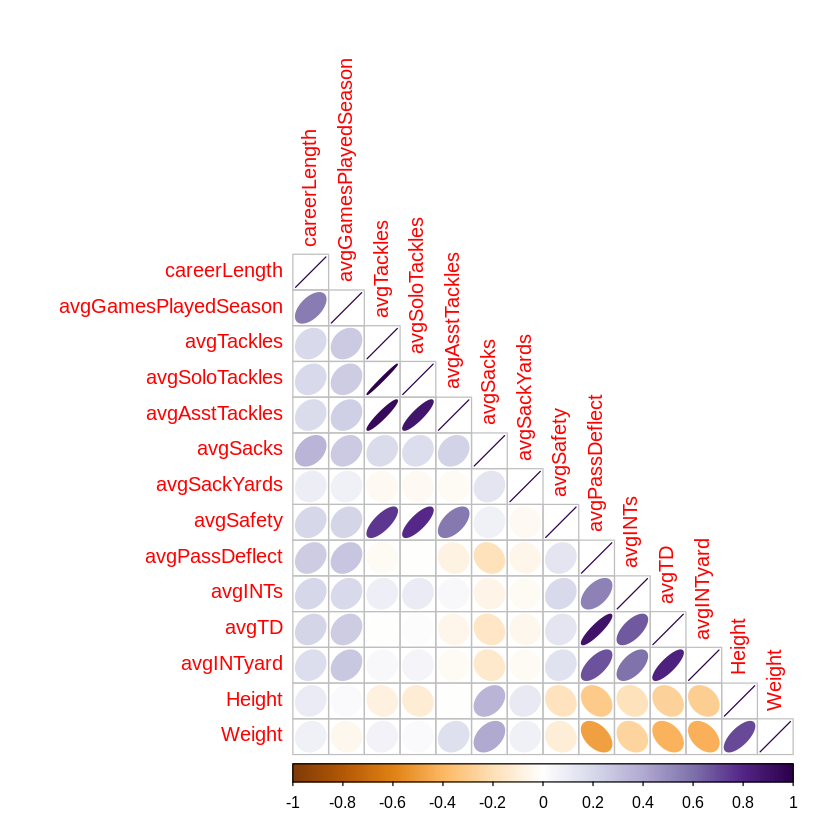

# 11. Originality

While a similar research proposal, *Can NFL Combine Results be Used to Estimate NFL Defensive Players Longevity* can be found on the National Library of Medicine Website, the research uses NFL Combine data,a different dataset than ours,to predict NFL defensive player longevity.

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8354768/

No other similar published works for linear regression found with same dataset.

# 12. References


1.   Stack Overflow Community. (2020). Convert height from ft 6.1 to inches (73 in). Stack Overflow. URL: https://stackoverflow.com/questions/64838855/convert-height-from-ft-6-1-to-inches-73-in-r
2.   Arizona Cardinals. (2023). *Cardinals sign Darius Philon to bolster defensive line*. https://www.azcardinals.com/news/cardinals-sign-darius-philon-to-bolster-defensive-line

